# MLB Winner Classifier
Baseball is one of America's favorite pastimes. Despite the sport decreasing in popularity, baseball still remains one of the most popular sports in America today. Many people go to the ballpark, hoping their favorite team is going to win. But what if we can create a model that can objectively predict the winner of a baseball game? I have scraped many websites gathering data for every game of the 2018 and 2019 MLB seasons. Using this data I would like to answer the question...
#### Can we accurately predict the winner of a baseball game?
Let's dive into the data and find out!

# Table of contents
* [Data set](#data-set)
* [EDA](#EDA)
 * [Target variable](#target-variable)
 * [Missing values](#missing-values)
 * [Unusual values](#unusual-values)
 * [Variable interactions](#variable-interactions)
 * [Outliers](#outliers)
 * [Handling outliers](#handling-outliers)
 * [Class imbalance](#class-imbalance)
 * [Univariate visualizations](#univariate-visualizations)
 * [Bivariate visualizations](#bivariate-visualizations)
 * [Significant features](#significant-features)
 * [Intercorrelation of features](#intercorrelation)
 * [PCA](#pca)
* [Models](#baseline)
 * [Baseline](#baseline)
 * [Logistic resgression](#logistic-regression)
 * [XGBoost](#xgboost)
 * [Neural network](#neural-network)
 * [SVM](#svm)
 * [Gradient boosting classifier](#gradient-boosting)
 * [Random forest](#random-forest)
 * [Stacked model](#stacked-model)
* [Model improvement using added features](#model-improvement)
 * [Logistic resgression with added features](#logistic-regression)
 * [XGBoost with added features](#xgboost-added-features)
 * [Neural network with added features](#neural-network-added-features)
 * [SVM with added features](#svm-added-features)
 * [Gradient boosting classifier with added features](#gradient-boosting-added-features)
 * [Random forest with added features](#random-forest-added-features)
 * [Stacked model with added features](#stacked-model-added-features)
* [Conclusion](#conclusion)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import ensemble
from sklearn.svm import SVC
import math
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from vecstack import stacking
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

<a name="data-set"></a>
# Data set 

In [4]:
df = pd.read_csv('MLB_game_data.csv')

In [5]:
df.head()

,date,home_team,away_team,home_team_runs,away_runs,home_hits,away_hits,home_errors,away_errors,double_header,...,home_team_RL_5dimes,total_runs_open,total_runs_5dimes,over_open,under_open,over_5dimes,under_5dimes,game_date,home_pitcher_whip,away_pitcher_whip
0,2018-03-29,MIAMI MARLINS,CHICAGO CUBS,4.0,8.0,8.0,9.0,2.0,2.0,0.0,...,110.0,8.0,8.0,-105.0,-115.0,-110.0,100.0,2018-03-29,0.0,0.0
1,2018-03-29,NEW YORK METS,ST. LOUIS CARDINALS,9.0,4.0,12.0,6.0,0.0,1.0,0.0,...,163.0,7.0,6.5,-106.0,-114.0,-120.0,110.0,2018-03-29,0.0,0.0
2,2018-03-29,ATLANTA BRAVES,PHILADELPHIA PHILLIES,8.0,5.0,9.0,6.0,0.0,1.0,0.0,...,-150.0,8.0,8.0,-110.0,-110.0,-116.0,106.0,2018-03-29,0.0,0.0
3,2018-03-29,LOS ANGELES DODGERS,SAN FRANCISCO GIANTS,0.0,1.0,6.0,8.0,0.0,0.0,0.0,...,-135.0,7.0,7.5,100.0,-120.0,-115.0,105.0,2018-03-29,0.0,0.0
4,2018-03-29,ARIZONA DIAMONDBACKS,COLORADO ROCKIES,8.0,2.0,12.0,9.0,0.0,0.0,0.0,...,185.0,9.0,8.0,-119.0,-101.0,-110.0,100.0,2018-03-29,0.0,0.0


<a name="EDA"></a>
# EDA 

In [6]:
# converting date column to datetime
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4425 entries, 0 to 4424
Data columns (total 43 columns):
date                     4425 non-null datetime64[ns]
home_team                4425 non-null object
away_team                4425 non-null object
home_team_runs           4425 non-null float64
away_runs                4425 non-null float64
home_hits                4425 non-null float64
away_hits                4425 non-null float64
home_errors              4425 non-null float64
away_errors              4425 non-null float64
double_header            4425 non-null float64
home_pitcher             4425 non-null object
home_pitcher_hand        4425 non-null object
home_pitcher_ERA         4425 non-null float64
home_pitcher_total_SO    4425 non-null float64
home_pitcher_wins        4425 non-null float64
home_pitcher_losses      4425 non-null float64
away_pitcher             4425 non-null object
away_pitcher_hand        4425 non-null object
away_pitcher_ERA         4425 non-null float64

In [8]:
df.describe(include='all')

,date,home_team,away_team,home_team_runs,away_runs,home_hits,away_hits,home_errors,away_errors,double_header,...,home_team_RL_5dimes,total_runs_open,total_runs_5dimes,over_open,under_open,over_5dimes,under_5dimes,game_date,home_pitcher_whip,away_pitcher_whip
count,4425,4425,4425,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,...,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425,4425.000000,4425.000000
unique,365,30,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365,NaN,NaN
top,2019-06-08 00:00:00,CINCINNATI REDS,PITTSBURGH PIRATES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-08,NaN,NaN
freq,17,153,153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN,NaN
first,2018-03-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-09-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,4.681356,4.619435,8.443390,8.658757,0.577853,0.603164,0.038418,...,28.314802,8.854350,8.842034,-74.421695,-76.718870,-35.584859,-44.461469,NaN,1.204192,1.201871
std,NaN,NaN,NaN,3.253414,3.294233,3.360231,3.603630,0.795192,0.807564,0.248626,...,137.455933,1.064689,1.127955,81.317420,79.575263,100.992816,97.808294,NaN,0.470317,0.472591
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-360.000000,6.000000,6.000000,-145.000000,-132.000000,-165.000000,-159.000000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,2.000000,2.000000,6.000000,6.000000,0.000000,0.000000,0.000000,...,-125.000000,8.000000,8.000000,-115.000000,-115.000000,-110.000000,-110.000000,NaN,1.080000,1.070000


<a name="target-variable"></a>
# Creating our target

The target variable I would like to predict is the winner for each game. I will classify a home team victory as 0, and I will classify a home team loss as 1.

In [9]:
# First we must establish the winner of the game
def winner(s):
    # if home team wins return 0
    if s['home_team_runs'] > s['away_runs']:
        return 0
    # if away team wins return 1
    if s['away_runs'] > s['home_team_runs']:
        return 1

df['winner'] = df.apply(winner, axis=1)

<a name="missing-values"></a>
# Missing values

In [10]:
# Percentage of missing values in every column
df.isnull().sum()/df.isnull().count()

date                     0.0
home_team                0.0
away_team                0.0
home_team_runs           0.0
away_runs                0.0
home_hits                0.0
away_hits                0.0
home_errors              0.0
away_errors              0.0
double_header            0.0
home_pitcher             0.0
home_pitcher_hand        0.0
home_pitcher_ERA         0.0
home_pitcher_total_SO    0.0
home_pitcher_wins        0.0
home_pitcher_losses      0.0
away_pitcher             0.0
away_pitcher_hand        0.0
away_pitcher_ERA         0.0
away_pitcher_total_SO    0.0
away_pitcher_wins        0.0
away_pitcher_losses      0.0
home_pitcher_starts      0.0
away_pitcher_starts      0.0
home_pitcher_avg_SO      0.0
away_pitcher_avg_SO      0.0
away_team_ML_open        0.0
home_team_ML_open        0.0
away_team_ML_5dimes      0.0
home_team_ML_5dimes      0.0
away_team_RL_open        0.0
home_team_RL_open        0.0
away_team_RL_5dimes      0.0
home_team_RL_5dimes      0.0
total_runs_ope

There are no missing values.

<a name="unusual-values"></a>
# Unusual values for categorical variables

I did a significant amount of cleaning when I was scraping this data, so I don't expect there to be many unusual values.

In [11]:
print(df['home_team'].unique())

['MIAMI MARLINS' 'NEW YORK METS' 'ATLANTA BRAVES' 'LOS ANGELES DODGERS'
 'ARIZONA DIAMONDBACKS' 'BALTIMORE ORIOLES' 'TEXAS RANGERS'
 'TORONTO BLUE JAYS' 'TAMPA BAY RAYS' 'KANSAS CITY ROYALS'
 'SEATTLE MARINERS' 'SAN DIEGO PADRES' 'OAKLAND ATHLETICS'
 'CINCINNATI REDS' 'DETROIT TIGERS' 'MILWAUKEE BREWERS' 'HOUSTON ASTROS'
 'LOS ANGELES ANGELS' 'PITTSBURGH PIRATES' 'SAN FRANCISCO GIANTS'
 'NEW YORK YANKEES' 'WASHINGTON NATIONALS' 'PHILADELPHIA PHILLIES'
 'COLORADO ROCKIES' 'CLEVELAND INDIANS' 'ST. LOUIS CARDINALS'
 'CHICAGO WHITE SOX' 'MINNESOTA TWINS' 'BOSTON RED SOX' 'CHICAGO CUBS']


There appears to be no unusual values for the home_team column.

In [12]:
print(df['away_team'].unique())

['CHICAGO CUBS' 'ST. LOUIS CARDINALS' 'PHILADELPHIA PHILLIES'
 'SAN FRANCISCO GIANTS' 'COLORADO ROCKIES' 'MINNESOTA TWINS'
 'HOUSTON ASTROS' 'NEW YORK YANKEES' 'BOSTON RED SOX' 'CHICAGO WHITE SOX'
 'CLEVELAND INDIANS' 'MILWAUKEE BREWERS' 'LOS ANGELES ANGELS'
 'WASHINGTON NATIONALS' 'PITTSBURGH PIRATES' 'LOS ANGELES DODGERS'
 'KANSAS CITY ROYALS' 'BALTIMORE ORIOLES' 'TEXAS RANGERS'
 'SEATTLE MARINERS' 'TAMPA BAY RAYS' 'NEW YORK METS' 'MIAMI MARLINS'
 'CINCINNATI REDS' 'ATLANTA BRAVES' 'TORONTO BLUE JAYS'
 'OAKLAND ATHLETICS' 'SAN DIEGO PADRES' 'ARIZONA DIAMONDBACKS'
 'DETROIT TIGERS']


There appears to be no unusual values for the away_team column.

In [13]:
print(df['home_pitcher'].unique())

['J URENA' 'N SYNDERGAARD' 'J TEHERAN' 'C KERSHAW' 'P CORBIN' 'D BUNDY'
 'C HAMELS' 'J HAPP' 'C ARCHER' 'D DUFFY' 'F HERNANDEZ' 'C SMITH'
 'M FOLTYNEWICZ' 'R RAY' 'A WOOD' 'J LUCCHESI' 'A SANCHEZ' 'B SNELL'
 'D FISTER' 'S MANAEA' 'H BAILEY' 'J ZIMMERMANN' 'J DEGROM' 'L CASTILLO'
 'B MCCARTHY' 'O DESPAIGNE' 'Z GREINKE' 'L PERDOMO' 'K MAEDA' 'M MOORE'
 'D MENGDEN' 'M ESTRADA' 'J PAXTON' 'I KENNEDY' 'D PETERS' 'S MATZ'
 'S ROMANO' 'R HILL' 'K GAUSMAN' 'M STROMAN' 'J FARIA' 'M MINOR'
 'D GOSSETT' 'M LEAKE' 'M FULMER' 'R CARPENTER' 'Z DAVIES' 'T MAHLE'
 'S NEWCOMB' 'T WALKER' 'B MITCHELL' 'F LIRIANO' 'J GARCIA' 'C MORTON'
 'A TRIGGS' 'J RAMIREZ' 'J TAILLON' 'T RICHARDS' 'C ANDERSON' 'Z GODLEY'
 'T ROSS' 'M BOYD' 'J VERLANDER' 'K GRAVEMAN' 'G RICHARDS' 'T BLACH'
 'J MONTGOMERY' 'J CHACIN' 'C RICHARD' 'L SEVERINO' 'D KEUCHEL' 'T SKAGGS'
 'I NOVA' 'J CUETO' 'S STRASBURG' 'N PIVETTA' 'S BRAULT' 'M TANAKA'
 'G MARQUEZ' 'T WILLIAMS' 'B WOODRUFF' 'C CARRASCO' 'C SABATHIA'
 'P BRIDWELL' 'L JR.' 'G 

There appears to be no unusual values for the home_pitcher column.

In [14]:
print(df['away_pitcher'].unique())

['J LESTER' 'C MARTINEZ' 'A NOLA' 'T BLACH' 'J GRAY' 'J ODORIZZI'
 'J VERLANDER' 'L SEVERINO' 'C SALE' 'J SHIELDS' 'C KLUBER' 'K HENDRICKS'
 'N PIVETTA' 'T ANDERSON' 'J CUETO' 'J CHACIN' 'M TANAKA' 'D PRICE'
 'D KEUCHEL' 'T SKAGGS' 'M SCHERZER' 'I NOVA' 'M WACHA' 'S STRASBURG'
 'V VELASQUEZ' 'Y DARVISH' 'G MARQUEZ' 'B SUTER' 'D HOLLAND' 'L JR.'
 'M SHOEMAKER' 'C SABATHIA' 'C CARRASCO' 'L GIOLITO' 'J QUINTANA'
 'L WEAVER' 'G GONZALEZ' 'C STRATTON' 'J BERRIOS' 'S GRAY' 'H VELAZQUEZ'
 'G COLE' 'S OHTANI' 'T BAUER' 'T WILLIAMS' 'C KUHL' 'M MIKOLAS'
 'T CHATWOOD' 'T ROARK' 'H RYU' 'C BETTIS' 'J HAMMEL' 'R LOPEZ'
 'C TILLMAN' 'B COLON' 'M CLEVINGER' 'L LYNN' 'B JOHNSON' 'A COLE'
 'J FLAHERTY' 'C KERSHAW' 'K FREELAND' 'J JUNIS' 'M GONZALEZ' 'M WRIGHT'
 'C HAMELS' 'J TOMLIN' 'M GONZALES' 'C ARCHER' 'A WOOD' 'B SNELL'
 'D BUNDY' 'C FULMER' 'D FISTER' 'F HERNANDEZ' 'J DEGROM' 'C SMITH'
 'H BAILEY' 'M PEREZ' 'A CASHNER' 'B MCCARTHY' 'L CASTILLO' 'D DUFFY'
 'K GAUSMAN' 'M ESTRADA' 'D GOSSETT' 'L P

There appears to be no unusual values for the away_pitcher column.

In [15]:
print(df['home_pitcher_hand'].unique())

['RHP' 'LHP' 'LD' 'LZ']


In [16]:
print(df['away_pitcher_hand'].unique())

['LHP' 'RHP' 'LD' 'LZ']


LD and LZ appear to be unusual values for pitching hand coloumns. First I will determing if these columns will be useful features for our model. If the columns are indeed useful features, then I will correct these unusual values with the proper throwing hand of the pitcher.

<a name="variable-interactions"></a>
# Variable interactions

I believe variable interaction needs to be included in our model. For example, a pitcher with a great ERA has a significant advantage over a pitcher with a terrible ERA. However, that same pitcher with a great ERA does not have the same advantage over another pitcher with a great ERA. Therefore, I created interaction variables which subtract the away team pitcher variables from the home pitcher variables. I will verify later in this notebook if these interaction variables will be useful for our model.

In [17]:
# creating interaction variables
df['era_diff'] = df['home_pitcher_ERA'] - df['away_pitcher_ERA']
df['total_SO_diff'] = df['home_pitcher_total_SO'] - df['away_pitcher_total_SO']
df['pitcher_win_diff'] = df['home_pitcher_wins'] - df['away_pitcher_wins']
df['pitcher_loss_diff'] = df['home_pitcher_losses'] - df['away_pitcher_losses']
df['whip_diff'] = df['home_pitcher_whip'] - df['away_pitcher_whip']

<a name="outliers"></a>
# Outliers

I considered outliers any value more than 1.5 times outside the inner quartile range. I used log transformations or winsorization to deal with these values.

In [18]:
continous_cols = ['home_team_runs', 'away_runs', 'home_hits', 'away_hits', 'home_errors', 'away_errors',
                  'double_header', 'home_pitcher_ERA', 'home_pitcher_total_SO', 'home_pitcher_wins',
                  'home_pitcher_losses', 'away_pitcher_ERA', 'away_pitcher_total_SO', 'away_pitcher_wins',
                  'away_pitcher_losses', 'home_pitcher_starts', 'away_pitcher_starts', 'home_pitcher_avg_SO',
                  'away_pitcher_avg_SO', 'away_team_ML_open', 'home_team_ML_open', 'away_team_ML_5dimes',
                  'home_team_ML_5dimes', 'away_team_RL_open', 'home_team_RL_open', 'away_team_RL_5dimes',
                  'home_team_RL_5dimes', 'total_runs_open', 'total_runs_5dimes', 'over_open', 'under_open',
                  'over_5dimes', 'under_5dimes', 'home_pitcher_whip', 'away_pitcher_whip', 'era_diff',
                  'whip_diff', 'total_SO_diff', 'pitcher_win_diff', 'pitcher_loss_diff']

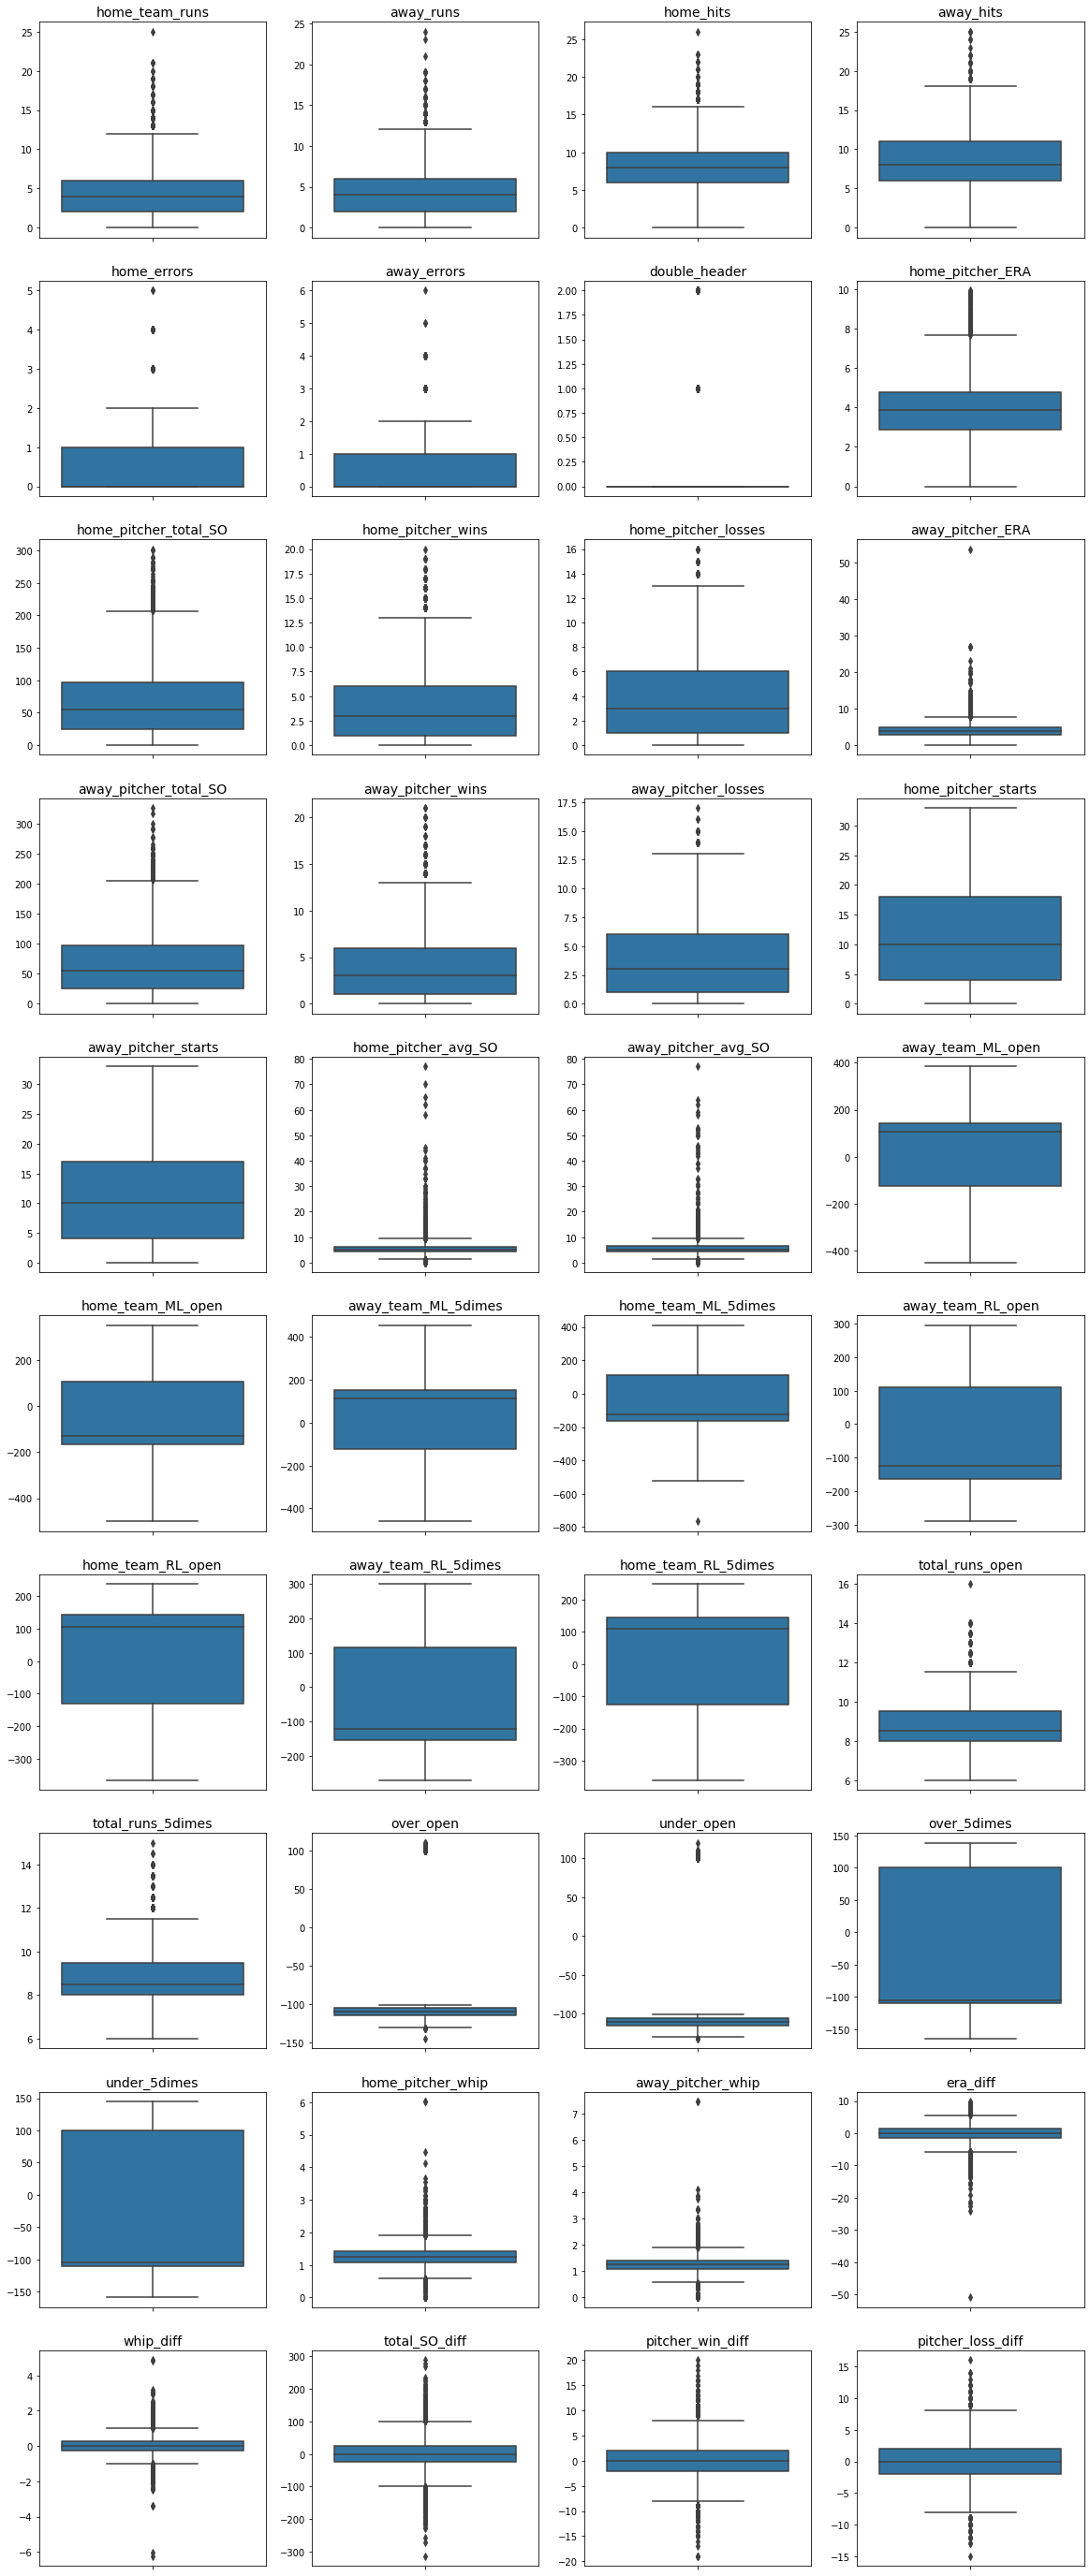

In [19]:
plt.figure(figsize=(20,50))
plt.subplots_adjust(hspace=.2)

i = 1
for col in continous_cols:
    plt.subplot(10,4,i)
    sns.boxplot(y=df[col])
    plt.title(col, fontsize=14)
    plt.ylabel('')
    i += 1
plt.show()

<a name="univariate-visualizations"></a>
# Univariate Visualizations

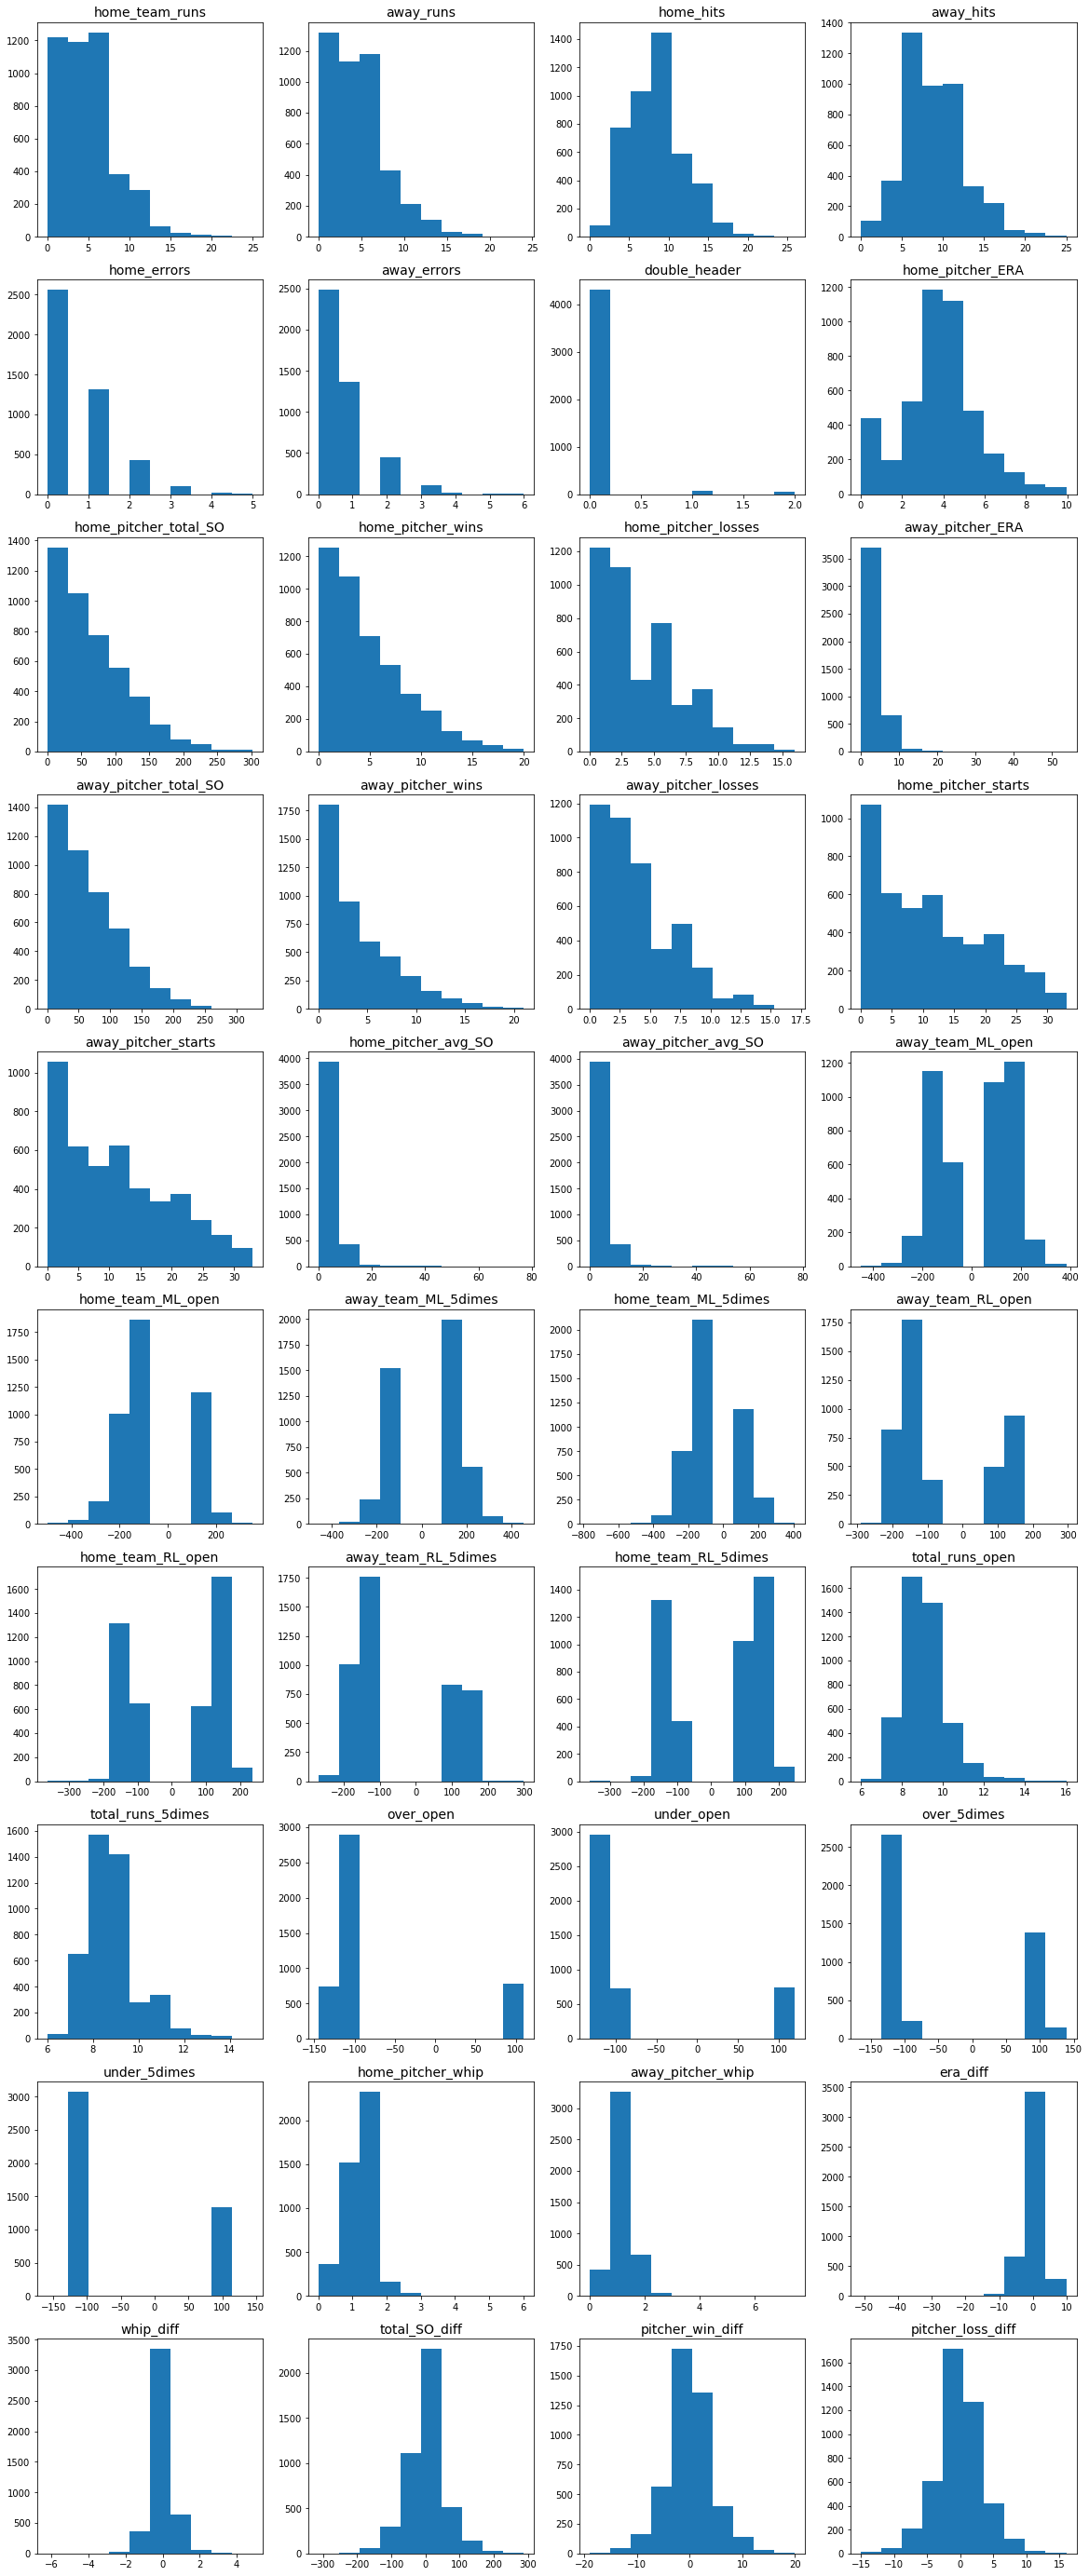

In [20]:
plt.figure(figsize=(20,50))
plt.subplots_adjust(hspace=.2)

i = 1
for col in continous_cols:
    plt.subplot(10,4,i)
    plt.hist(df[col])
    plt.title(col, fontsize=14)
    plt.ylabel('')
    i += 1

<a name="class-imbalance"></a>
# Class Imbalance

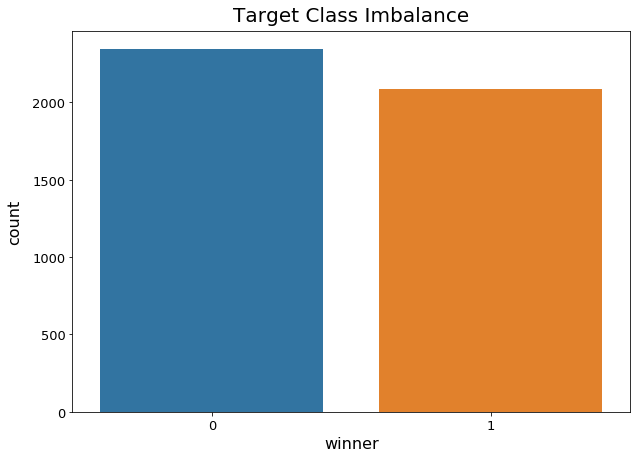

In [23]:
# univariate analysis of our target
plt.figure(figsize=(10,7))

sns.countplot(df['winner'])
plt.xlabel('winner', fontsize=16)
plt.xticks(fontsize=13)
plt.ylabel('count', fontsize=16, labelpad=10)
plt.title('Target Class Imbalance', fontsize=20, pad=10)
plt.yticks(fontsize=13)
plt.show()

There appears to be very little class imbalance with our target variable.

<a name="handling-outliers"></a>
# Handling outliers

I will use log transformations and/or winsorization to handle outliers, depending on the distribution of the variable.

### Handling outliers for pitcher_ERA using log transformations.

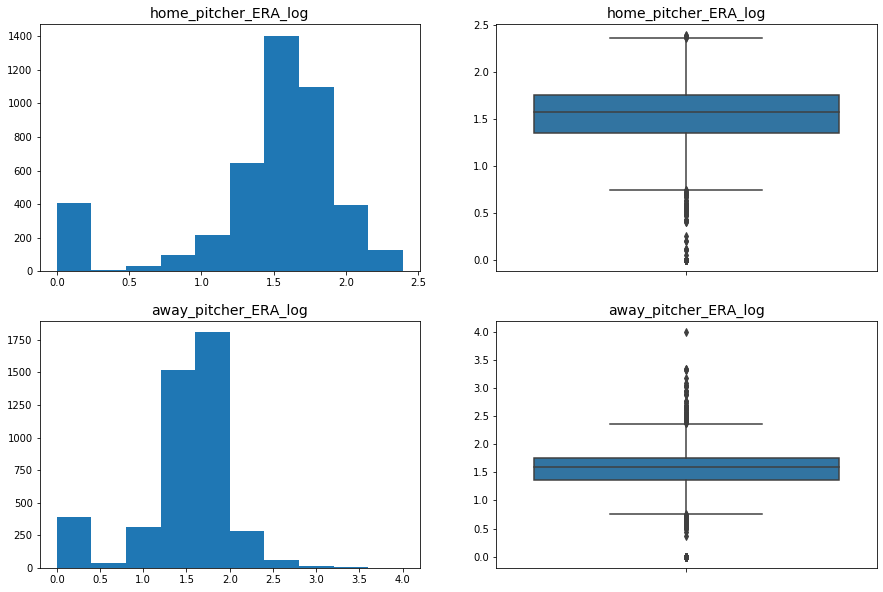

In [25]:
df['home_pitcher_ERA_log'] = np.log(df['home_pitcher_ERA']+1)
df['away_pitcher_ERA_log'] = np.log(df['away_pitcher_ERA']+1)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(df['home_pitcher_ERA_log'])
plt.title('home_pitcher_ERA_log', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,2)
sns.boxplot(y = df['home_pitcher_ERA_log'])
plt.title('home_pitcher_ERA_log', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,3)
plt.hist(df['away_pitcher_ERA_log'])
plt.title('away_pitcher_ERA_log', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,4)
sns.boxplot(y = df['away_pitcher_ERA_log'])
plt.title('away_pitcher_ERA_log', fontsize=14)
plt.ylabel('')

plt.show()

Log transformation did not deal with all fo the outliers. I will use winsorization to deal with the rest.

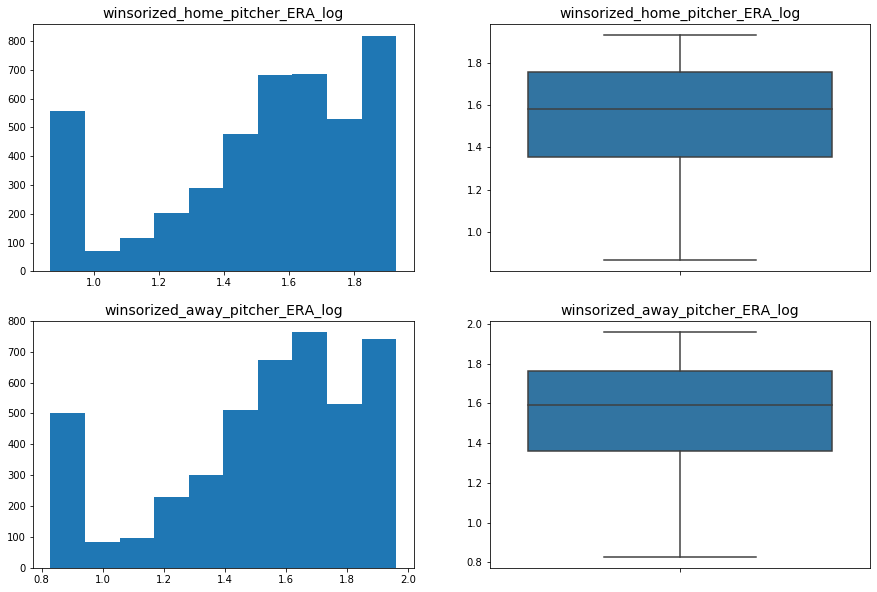

In [26]:
from winsor import winsorize_col

winsorize_col('home_pitcher_ERA_log', df)
winsorize_col('away_pitcher_ERA_log', df)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(df['winsorized_home_pitcher_ERA_log'])
plt.title('winsorized_home_pitcher_ERA_log', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,2)
sns.boxplot(y = df['winsorized_home_pitcher_ERA_log'])
plt.title('winsorized_home_pitcher_ERA_log', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,3)
plt.hist(df['winsorized_away_pitcher_ERA_log'])
plt.title('winsorized_away_pitcher_ERA_log', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,4)
sns.boxplot(y = df['winsorized_away_pitcher_ERA_log'])
plt.title('winsorized_away_pitcher_ERA_log', fontsize=14)
plt.ylabel('')


plt.show()

Now all outliers have been handled

### Handling outliers for total strikeouts (SO) using log transformations.

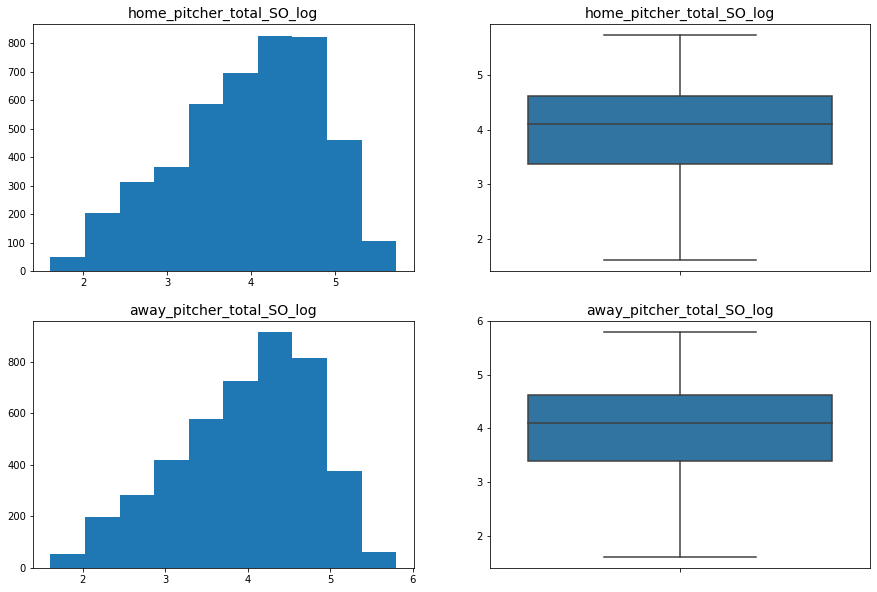

In [27]:
# Handling outliers for home_pitcher_total_SO using log transformations.
df['home_pitcher_total_SO_log'] = np.log(df['home_pitcher_total_SO']+5)
df['away_pitcher_total_SO_log'] = np.log(df['away_pitcher_total_SO']+5)
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(df['home_pitcher_total_SO_log'])
plt.title('home_pitcher_total_SO_log', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,2)
sns.boxplot(y = df['home_pitcher_total_SO_log'])
plt.title('home_pitcher_total_SO_log', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,3)
plt.hist(df['away_pitcher_total_SO_log'])
plt.title('away_pitcher_total_SO_log', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,4)
sns.boxplot(y = df['away_pitcher_total_SO_log'])
plt.title('away_pitcher_total_SO_log', fontsize=14)
plt.ylabel('')

plt.show()

Log transformation handled all of the outliers.

### Handling outliers for pitcher wins using log transformations.

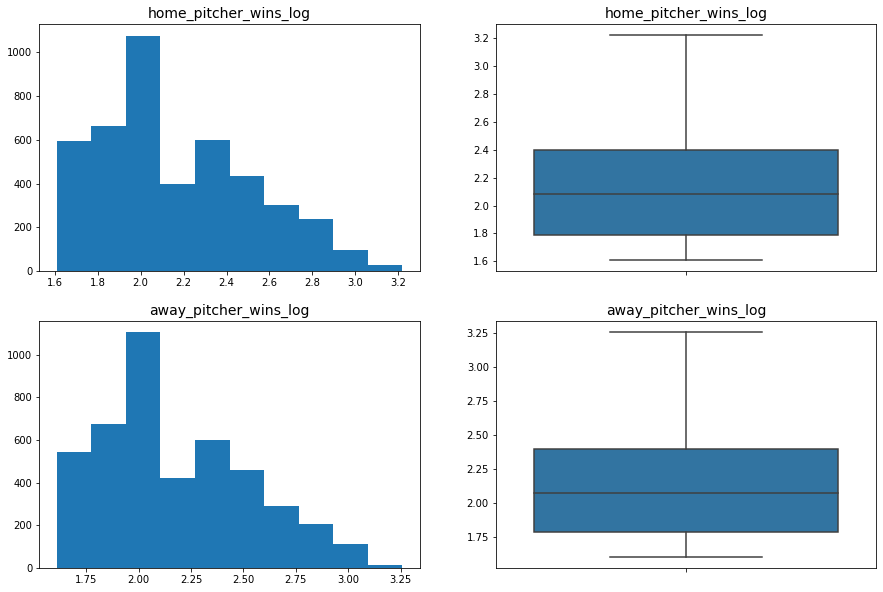

In [28]:
df['home_pitcher_wins_log'] = np.log(df['home_pitcher_wins']+5)
df['away_pitcher_wins_log'] = np.log(df['away_pitcher_wins']+5)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(df['home_pitcher_wins_log'])
plt.title('home_pitcher_wins_log', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,2)
sns.boxplot(y = df['home_pitcher_wins_log'])
plt.title('home_pitcher_wins_log', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,3)
plt.hist(df['away_pitcher_wins_log'])
plt.title('away_pitcher_wins_log', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,4)
sns.boxplot(y = df['away_pitcher_wins_log'])
plt.title('away_pitcher_wins_log', fontsize=14)
plt.ylabel('')

plt.show()

Log transformation handled all of the outliers.

### Handling outliers for pitcher losses using log transformations.

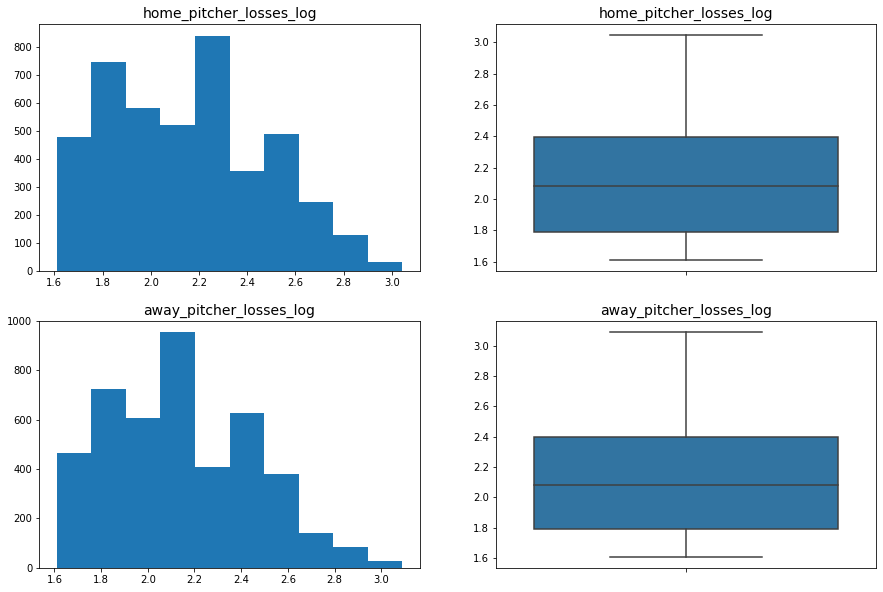

In [29]:
df['home_pitcher_losses_log'] = np.log(df['home_pitcher_losses']+5)
df['away_pitcher_losses_log'] = np.log(df['away_pitcher_losses']+5)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(df['home_pitcher_losses_log'])
plt.title('home_pitcher_losses_log', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,2)
sns.boxplot(y = df['home_pitcher_losses_log'])
plt.title('home_pitcher_losses_log', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,3)
plt.hist(df['away_pitcher_losses_log'])
plt.title('away_pitcher_losses_log', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,4)
sns.boxplot(y = df['away_pitcher_losses_log'])
plt.title('away_pitcher_losses_log', fontsize=14)
plt.ylabel('')

plt.show()

Log transformation handled all of the outliers.

### Handling outliers for pitcher average SO using log transformations.

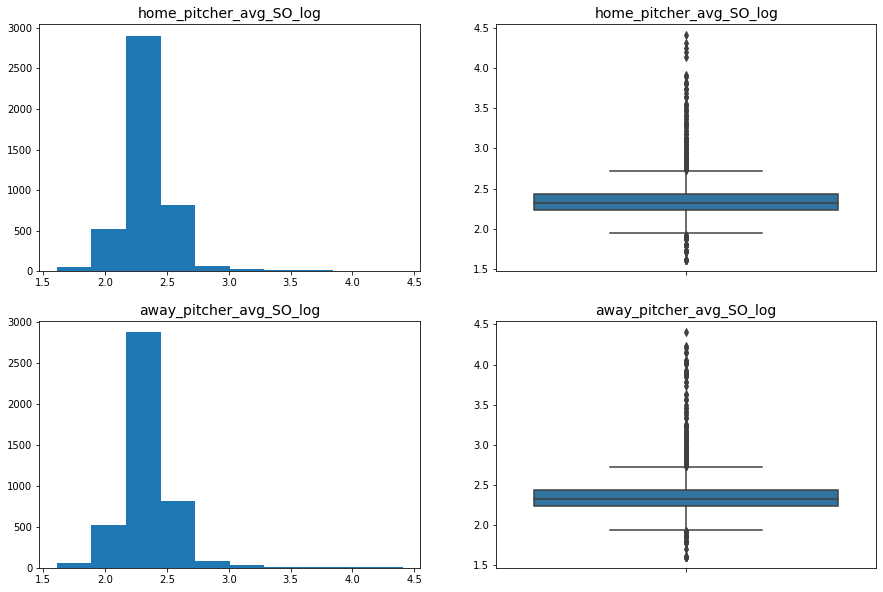

In [30]:
df['home_pitcher_avg_SO_log'] = np.log(df['home_pitcher_avg_SO']+5)
df['away_pitcher_avg_SO_log'] = np.log(df['away_pitcher_avg_SO']+5)
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(df['home_pitcher_avg_SO_log'])
plt.title('home_pitcher_avg_SO_log', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,2)
sns.boxplot(y = df['home_pitcher_avg_SO_log'])
plt.title('home_pitcher_avg_SO_log', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,3)
plt.hist(df['away_pitcher_avg_SO_log'])
plt.title('away_pitcher_avg_SO_log', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,4)
sns.boxplot(y = df['away_pitcher_avg_SO_log'])
plt.title('away_pitcher_avg_SO_log', fontsize=14)
plt.ylabel('')

plt.show()

Log transformations did not handle all of the outliers. I will use winsorization to handle the rest.

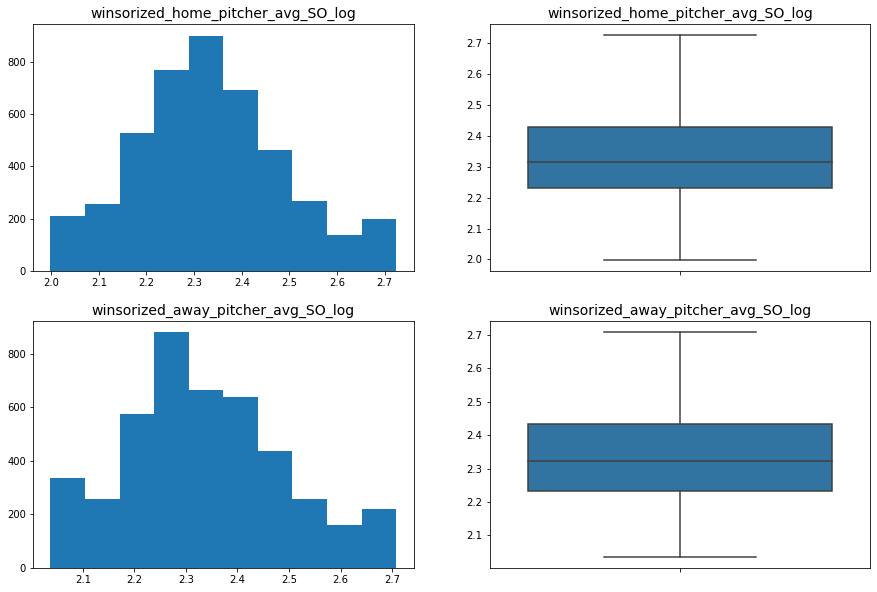

In [31]:
winsorize_col('home_pitcher_avg_SO_log', df)
winsorize_col('away_pitcher_avg_SO_log', df)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(df['winsorized_home_pitcher_avg_SO_log'])
plt.title('winsorized_home_pitcher_avg_SO_log', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,2)
sns.boxplot(y = df['winsorized_home_pitcher_avg_SO_log'])
plt.title('winsorized_home_pitcher_avg_SO_log', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,3)
plt.hist(df['winsorized_away_pitcher_avg_SO_log'])
plt.title('winsorized_away_pitcher_avg_SO_log', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,4)
sns.boxplot(y = df['winsorized_away_pitcher_avg_SO_log'])
plt.title('winsorized_away_pitcher_avg_SO_log', fontsize=14)
plt.ylabel('')


plt.show()

### Handling outliers for pitcher whip using log transformations.

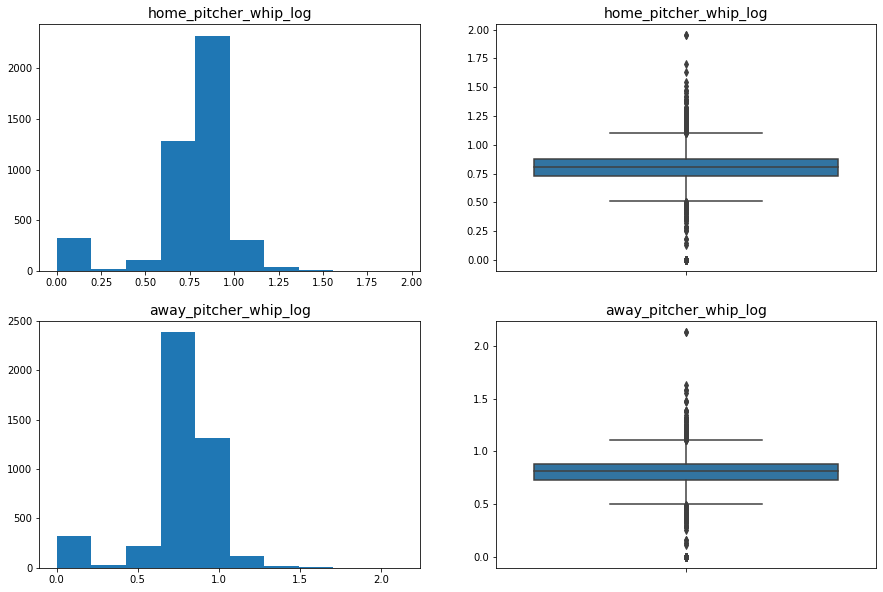

In [32]:
df['home_pitcher_whip_log'] = np.log(df['home_pitcher_whip']+1)
df['away_pitcher_whip_log'] = np.log(df['away_pitcher_whip']+1)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(df['home_pitcher_whip_log'])
plt.title('home_pitcher_whip_log', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,2)
sns.boxplot(y = df['home_pitcher_whip_log'])
plt.title('home_pitcher_whip_log', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,3)
plt.hist(df['away_pitcher_whip_log'])
plt.title('away_pitcher_whip_log', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,4)
sns.boxplot(y = df['away_pitcher_whip_log'])
plt.title('away_pitcher_whip_log', fontsize=14)
plt.ylabel('')

plt.show()

Log transformations did not handle all of the outliers. I will use winsorization to handle the rest.

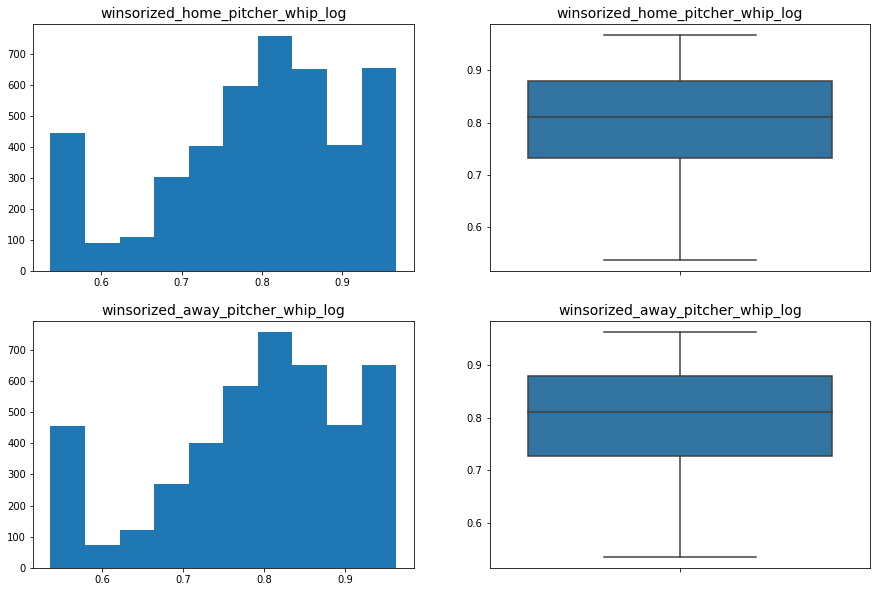

In [33]:
winsorize_col('home_pitcher_whip_log', df)
winsorize_col('away_pitcher_whip_log', df)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(df['winsorized_home_pitcher_whip_log'])
plt.title('winsorized_home_pitcher_whip_log', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,2)
sns.boxplot(y = df['winsorized_home_pitcher_whip_log'])
plt.title('winsorized_home_pitcher_whip_log', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,3)
plt.hist(df['winsorized_away_pitcher_whip_log'])
plt.title('winsorized_away_pitcher_whip_log', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,4)
sns.boxplot(y = df['winsorized_away_pitcher_whip_log'])
plt.title('winsorized_away_pitcher_whip_log', fontsize=14)
plt.ylabel('')


plt.show()

### Handling outliers for era_diff using log winsorization.

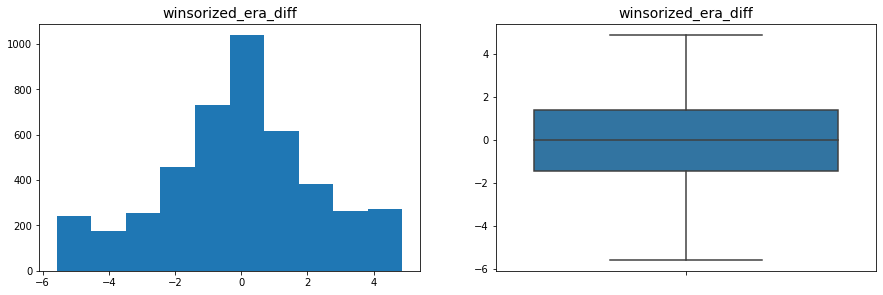

In [34]:
winsorize_col('era_diff', df)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(df['winsorized_era_diff'])
plt.title('winsorized_era_diff', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,2)
sns.boxplot(y = df['winsorized_era_diff'])
plt.title('winsorized_era_diff', fontsize=14)
plt.ylabel('')

plt.show()

### Handling outliers for total_SO_diff using log winsorization.

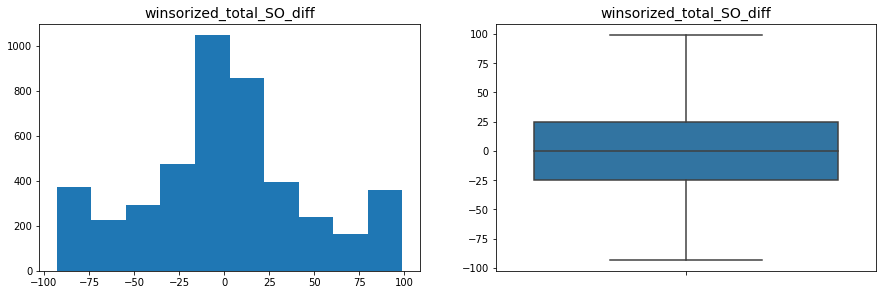

In [35]:
winsorize_col('total_SO_diff', df)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(df['winsorized_total_SO_diff'])
plt.title('winsorized_total_SO_diff', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,2)
sns.boxplot(y = df['winsorized_total_SO_diff'])
plt.title('winsorized_total_SO_diff', fontsize=14)
plt.ylabel('')

plt.show()

### Handling outliers for pitcher_win_diff using log winsorization.

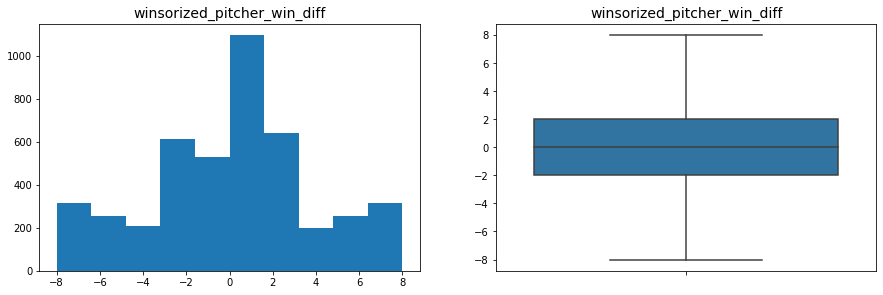

In [36]:
winsorize_col('pitcher_win_diff', df)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(df['winsorized_pitcher_win_diff'])
plt.title('winsorized_pitcher_win_diff', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,2)
sns.boxplot(y = df['winsorized_pitcher_win_diff'])
plt.title('winsorized_pitcher_win_diff', fontsize=14)
plt.ylabel('')

plt.show()

### Handling outliers for pitcher_loss_diff using log winsorization.

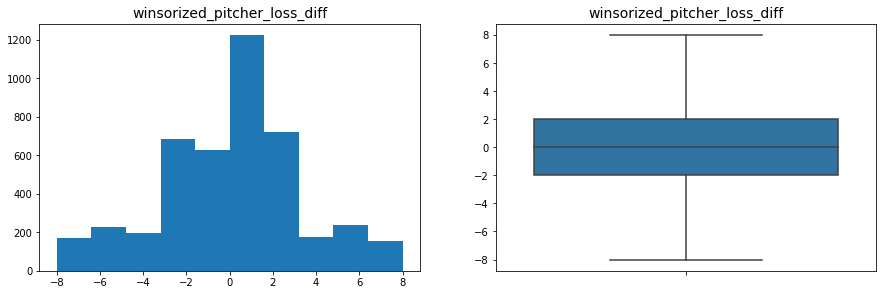

In [37]:
winsorize_col('pitcher_loss_diff', df)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(df['winsorized_pitcher_loss_diff'])
plt.title('winsorized_pitcher_loss_diff', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,2)
sns.boxplot(y = df['winsorized_pitcher_loss_diff'])
plt.title('winsorized_pitcher_loss_diff', fontsize=14)
plt.ylabel('')

plt.show()

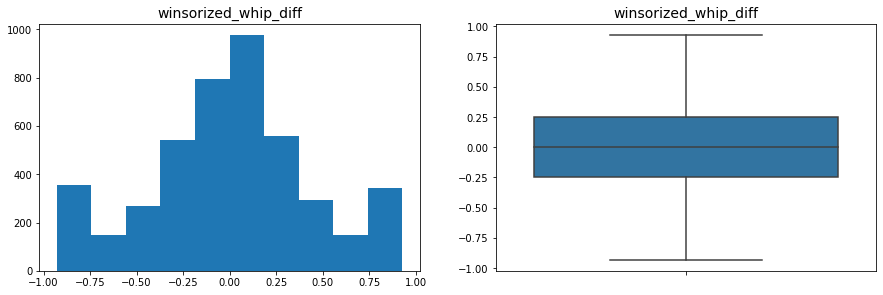

In [38]:
winsorize_col('whip_diff', df)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(df['winsorized_whip_diff'])
plt.title('winsorized_whip_diff', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,2)
sns.boxplot(y = df['winsorized_whip_diff'])
plt.title('winsorized_whip_diff', fontsize=14)
plt.ylabel('')

plt.show()

<a name="bivariate-visualizations"></a>
# Bivariate visualizations

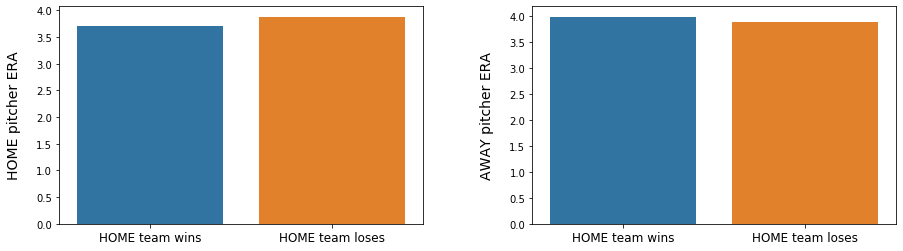

In [39]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(wspace=.3)

x1, x2 = ['HOME team wins', 'HOME team loses']
y1, y2 = df[df['winner'] == 0]['home_pitcher_ERA'], df[df['winner'] == 1]['home_pitcher_ERA']
plt.subplot(1, 2, 1)
sns.barplot(x=[x1, x2], y=[y1.mean(), y2.mean()])
plt.ylabel('HOME pitcher ERA', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)

x11, x22 = ['HOME team wins', 'HOME team loses']
y11, y22 = df[df['winner'] == 0]['away_pitcher_ERA'], df[df['winner'] == 1]['away_pitcher_ERA']
plt.subplot(1, 2, 2)
sns.barplot(x=[x11, x22], y=[y11.mean(), y22.mean()])
plt.ylabel('AWAY pitcher ERA', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)

plt.show()

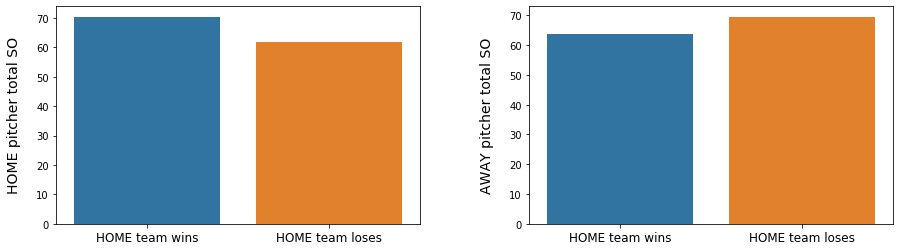

In [40]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(wspace=.3)

x1, x2 = ['HOME team wins', 'HOME team loses']
y1, y2 = df[df['winner'] == 0]['home_pitcher_total_SO'], df[df['winner'] == 1]['home_pitcher_total_SO']
plt.subplot(1, 2, 1)
sns.barplot(x=[x1, x2], y=[y1.mean(), y2.mean()])
plt.ylabel('HOME pitcher total SO', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)

x11, x22 = ['HOME team wins', 'HOME team loses']
y11, y22 = df[df['winner'] == 0]['away_pitcher_total_SO'], df[df['winner'] == 1]['away_pitcher_total_SO']
plt.subplot(1, 2, 2)
sns.barplot(x=[x11, x22], y=[y11.mean(), y22.mean()])
plt.ylabel('AWAY pitcher total SO', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)

plt.show()

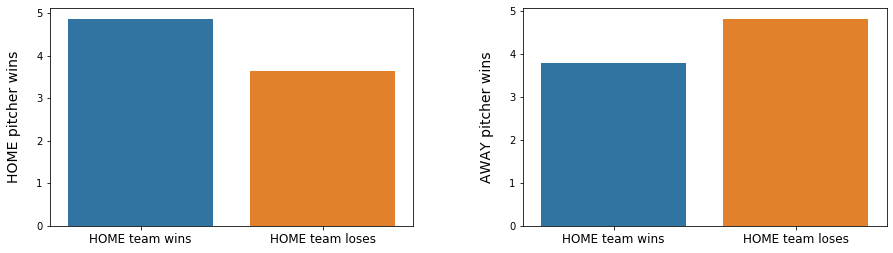

In [41]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(wspace=.3)

x1, x2 = ['HOME team wins', 'HOME team loses']
y1, y2 = df[df['winner'] == 0]['home_pitcher_wins'], df[df['winner'] == 1]['home_pitcher_wins']
plt.subplot(1, 2, 1)
sns.barplot(x=[x1, x2], y=[y1.mean(), y2.mean()])
plt.ylabel('HOME pitcher wins', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)

x11, x22 = ['HOME team wins', 'HOME team loses']
y11, y22 = df[df['winner'] == 0]['away_pitcher_wins'], df[df['winner'] == 1]['away_pitcher_wins']
plt.subplot(1, 2, 2)
sns.barplot(x=[x11, x22], y=[y11.mean(), y22.mean()])
plt.ylabel('AWAY pitcher wins', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)

plt.show()

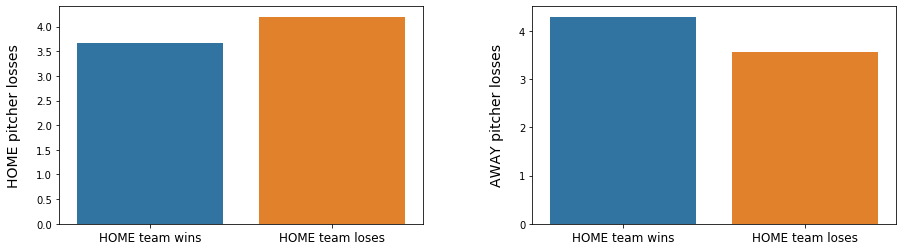

In [42]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(wspace=.3)

x1, x2 = ['HOME team wins', 'HOME team loses']
y1, y2 = df[df['winner'] == 0]['home_pitcher_losses'], df[df['winner'] == 1]['home_pitcher_losses']
plt.subplot(1, 2, 1)
sns.barplot(x=[x1, x2], y=[y1.mean(), y2.mean()])
plt.ylabel('HOME pitcher losses', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)

x11, x22 = ['HOME team wins', 'HOME team loses']
y11, y22 = df[df['winner'] == 0]['away_pitcher_losses'], df[df['winner'] == 1]['away_pitcher_losses']
plt.subplot(1, 2, 2)
sns.barplot(x=[x11, x22], y=[y11.mean(), y22.mean()])
plt.ylabel('AWAY pitcher losses', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)

plt.show()

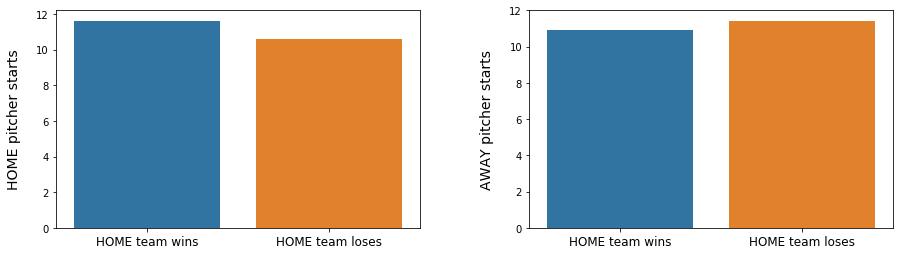

In [43]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(wspace=.3)

x1, x2 = ['HOME team wins', 'HOME team loses']
y1, y2 = df[df['winner'] == 0]['home_pitcher_starts'], df[df['winner'] == 1]['home_pitcher_starts']
plt.subplot(1, 2, 1)
sns.barplot(x=[x1, x2], y=[y1.mean(), y2.mean()])
plt.ylabel('HOME pitcher starts', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)

x11, x22 = ['HOME team wins', 'HOME team loses']
y11, y22 = df[df['winner'] == 0]['away_pitcher_starts'], df[df['winner'] == 1]['away_pitcher_starts']
plt.subplot(1, 2, 2)
sns.barplot(x=[x11, x22], y=[y11.mean(), y22.mean()])
plt.ylabel('AWAY pitcher starts', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)

plt.show()

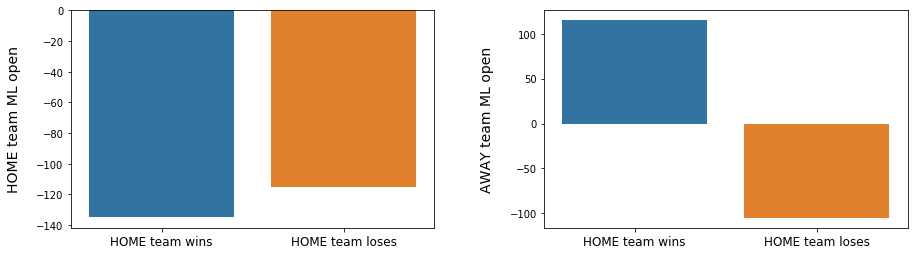

In [44]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(wspace=.3)

x1, x2 = ['HOME team wins', 'HOME team loses']
y1, y2 = df[df['winner'] == 0]['home_team_ML_open'], df[df['winner'] == 1]['home_team_ML_open']
plt.subplot(1, 2, 1)
sns.barplot(x=[x1, x2], y=[y1.median(), y2.median()])
plt.ylabel('HOME team ML open', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)

x11, x22 = ['HOME team wins', 'HOME team loses']
y11, y22 = df[df['winner'] == 0]['away_team_ML_open'], df[df['winner'] == 1]['away_team_ML_open']
plt.subplot(1, 2, 2)
sns.barplot(x=[x11, x22], y=[y11.median(), y22.median()])
plt.ylabel('AWAY team ML open', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)

plt.show()

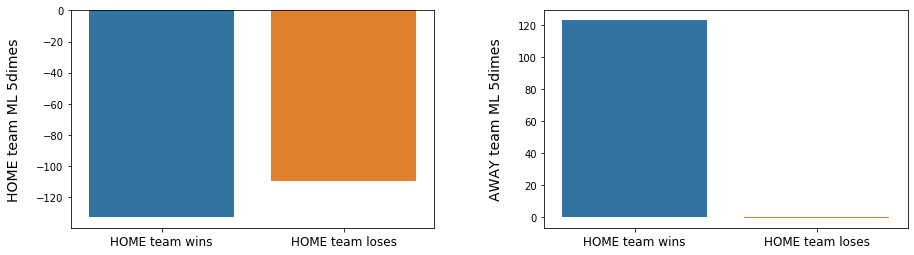

In [45]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(wspace=.3)

x1, x2 = ['HOME team wins', 'HOME team loses']
y1, y2 = df[df['winner'] == 0]['home_team_ML_5dimes'], df[df['winner'] == 1]['home_team_ML_5dimes']
plt.subplot(1, 2, 1)
sns.barplot(x=[x1, x2], y=[y1.median(), y2.median()])
plt.ylabel('HOME team ML 5dimes', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)

x11, x22 = ['HOME team wins', 'HOME team loses']
y11, y22 = df[df['winner'] == 0]['away_team_ML_5dimes'], df[df['winner'] == 1]['away_team_ML_5dimes']
plt.subplot(1, 2, 2)
sns.barplot(x=[x11, x22], y=[y11.median(), y22.median()])
plt.ylabel('AWAY team ML 5dimes', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)

plt.show()

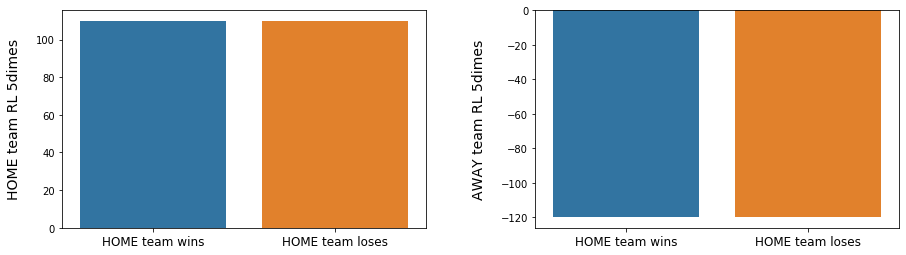

In [46]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(wspace=.3)

x1, x2 = ['HOME team wins', 'HOME team loses']
y1, y2 = df[df['winner'] == 0]['home_team_RL_5dimes'], df[df['winner'] == 1]['home_team_RL_5dimes']
plt.subplot(1, 2, 1)
sns.barplot(x=[x1, x2], y=[y1.median(), y2.median()])
plt.ylabel('HOME team RL 5dimes', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)

x11, x22 = ['HOME team wins', 'HOME team loses']
y11, y22 = df[df['winner'] == 0]['away_team_RL_5dimes'], df[df['winner'] == 1]['away_team_RL_5dimes']
plt.subplot(1, 2, 2)
sns.barplot(x=[x11, x22], y=[y11.median(), y22.median()])
plt.ylabel('AWAY team RL 5dimes', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)

plt.show()

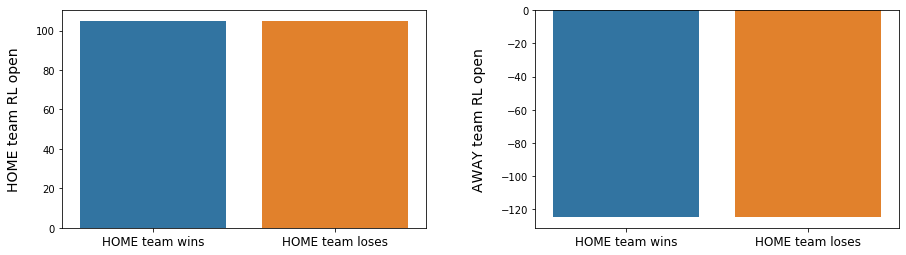

In [47]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(wspace=.3)

x1, x2 = ['HOME team wins', 'HOME team loses']
y1, y2 = df[df['winner'] == 0]['home_team_RL_open'], df[df['winner'] == 1]['home_team_RL_open']
plt.subplot(1, 2, 1)
sns.barplot(x=[x1, x2], y=[y1.median(), y2.median()])
plt.ylabel('HOME team RL open', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)

x11, x22 = ['HOME team wins', 'HOME team loses']
y11, y22 = df[df['winner'] == 0]['away_team_RL_open'], df[df['winner'] == 1]['away_team_RL_open']
plt.subplot(1, 2, 2)
sns.barplot(x=[x11, x22], y=[y11.median(), y22.median()])
plt.ylabel('AWAY team RL open', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)

plt.show()

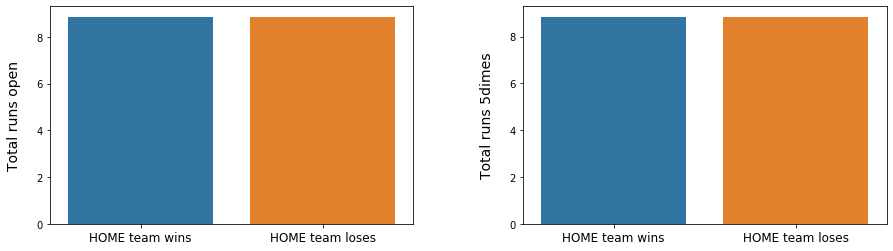

In [48]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(wspace=.3)

x1, x2 = ['HOME team wins', 'HOME team loses']
y1, y2 = df[df['winner'] == 0]['total_runs_open'], df[df['winner'] == 1]['total_runs_open']
plt.subplot(1, 2, 1)
sns.barplot(x=[x1, x2], y=[y1.mean(), y2.mean()])
plt.ylabel('Total runs open', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)

x11, x22 = ['HOME team wins', 'HOME team loses']
y11, y22 = df[df['winner'] == 0]['total_runs_5dimes'], df[df['winner'] == 1]['total_runs_5dimes']
plt.subplot(1, 2, 2)
sns.barplot(x=[x11, x22], y=[y11.mean(), y22.mean()])
plt.ylabel('Total runs 5dimes', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)

plt.show()

<a name="significant-features"></a>
## Finding significant features

Let's see which features have the most significant difference on whether a team wins or loses.
I am using a t-test with each feature to measure the difference. The t-test will consist of two groups.
Group 1 will be the feature values when the home team wins. Group 2 will be the feature values when the home team loses.

In [49]:
features = ['home_pitcher_total_SO', 'away_pitcher_total_SO',
             'home_pitcher_ERA', 'away_pitcher_ERA', 'home_pitcher_wins', 'away_pitcher_wins', 
             'home_pitcher_starts', 'away_pitcher_starts', 'home_pitcher_losses', 'away_pitcher_losses',
             'home_team_ML_open', 'away_team_ML_open','home_team_ML_5dimes', 'away_team_ML_5dimes',
             'home_team_RL_open', 'away_team_RL_open','home_team_RL_5dimes', 'away_team_RL_5dimes',
             'total_runs_open', 'total_runs_5dimes', 'winsorized_home_pitcher_ERA_log', 'winsorized_away_pitcher_ERA_log',
             'home_pitcher_total_SO_log', 'away_pitcher_total_SO_log', 'home_pitcher_wins_log', 'away_pitcher_wins_log',
             'home_pitcher_losses_log', 'away_pitcher_losses_log', 'era_diff', 'total_SO_diff', 'pitcher_win_diff',
             'pitcher_loss_diff', 'winsorized_era_diff', 'winsorized_total_SO_diff', 'winsorized_pitcher_win_diff',
             'winsorized_pitcher_loss_diff', 'winsorized_away_pitcher_whip_log', 'winsorized_home_pitcher_whip_log',
             'away_pitcher_whip_log', 'home_pitcher_whip_log', 'winsorized_whip_diff']


t_test = {}
print('home team wins (group 1) vs. home team loses (group 2):')
print('t-test and p-values')
print('--------------------------------------------------------')
for feat in features:
    group_1 = df[df['winner'] == 0][feat]
    group_2 = df[df['winner'] == 1][feat]
    t_test[feat] = (ttest_ind(group_1, group_2)[0], ttest_ind(group_1, group_2)[1])
sorted(t_test.items(), key = lambda x: x[1][1])

home team wins (group 1) vs. home team loses (group 2):
t-test and p-values
--------------------------------------------------------


[('winsorized_pitcher_win_diff', (17.82820799554227, 1.0292667921488759e-68)),
 ('pitcher_win_diff', (17.370398395708836, 1.964014087225073e-65)),
 ('away_team_ML_5dimes', (14.44647087178436, 2.9381244762292384e-46)),
 ('home_team_ML_5dimes', (-13.943978247317792, 2.7888623011496325e-43)),
 ('away_team_ML_open', (13.781667064873753, 2.436455690416343e-42)),
 ('home_team_ML_open', (-13.2526503568617, 2.427798761190506e-39)),
 ('winsorized_pitcher_loss_diff',
  (-12.543889614401044, 1.7145331413753587e-35)),
 ('pitcher_loss_diff', (-12.33972890188227, 2.0267503908027344e-34)),
 ('home_pitcher_wins_log', (11.468946645324527, 5.002165082057095e-30)),
 ('home_pitcher_wins', (10.743611051899967, 1.34859807866793e-26)),
 ('away_pitcher_wins_log', (-9.641419979663747, 8.741337234042474e-22)),
 ('away_pitcher_wins', (-9.268513470155128, 2.876751615484775e-20)),
 ('total_SO_diff', (8.52154204797984, 2.1314779659981377e-17)),
 ('away_pitcher_losses_log', (8.51239219927005, 2.3036996224837623e-17)

Certain features can not be used such as home_team_runs and home_hits. This is because the information is not available before the match starts.

The features that have the most significant difference with our target are
- winsorized_pitcher_win_diff
- away_team_ML_5dimes
- home_team_ML_5dimes
- away_team_ML_open
- home_team_ML_open
- winsorized_pitcher_loss_diff
- home_pitcher_wins_log
- away_pitcher_wins_log
- total_SO_diff
- away_pitcher_losses_log
- home_pitcher_losses_log
- home_pitcher_total_SO
- home_pitcher_starts
- away_pitcher_total_SO
- winsorized_whip_diff
- winsorized_era_diff
- winsorized_home_pitcher_whip_log
- home_pitcher_ERA
- winsorized_away_pitcher_whip_log
- away_pitcher_starts

First let's see if these significant features are correlated with each other before adding them to our model.
<a name="intercorrelation"></a>
# Intercorrelation of significant features

In [50]:
df[['winsorized_pitcher_win_diff', 'away_team_ML_5dimes', 'home_team_ML_5dimes',
    'away_team_ML_open', 'home_team_ML_open', 'winsorized_pitcher_loss_diff', 'home_pitcher_wins_log',
    'away_pitcher_wins_log', 'total_SO_diff', 'away_pitcher_losses_log', 'home_pitcher_losses_log',
    'home_pitcher_total_SO', 'home_pitcher_starts', 'away_pitcher_total_SO', 'winsorized_whip_diff',
    'winsorized_era_diff', 'winsorized_home_pitcher_whip_log', 'home_pitcher_ERA', 'winsorized_away_pitcher_whip_log',
    'away_pitcher_starts']].corr()

,winsorized_pitcher_win_diff,away_team_ML_5dimes,home_team_ML_5dimes,away_team_ML_open,home_team_ML_open,winsorized_pitcher_loss_diff,home_pitcher_wins_log,away_pitcher_wins_log,total_SO_diff,away_pitcher_losses_log,home_pitcher_losses_log,home_pitcher_total_SO,home_pitcher_starts,away_pitcher_total_SO,winsorized_whip_diff,winsorized_era_diff,winsorized_home_pitcher_whip_log,home_pitcher_ERA,winsorized_away_pitcher_whip_log,away_pitcher_starts
winsorized_pitcher_win_diff,1.000000,0.495187,-0.497947,0.489701,-0.500630,0.194620,0.575060,-0.555725,0.776059,-0.105986,0.132936,0.438545,0.387967,-0.406675,-0.127348,-0.147377,-0.112046,-0.082842,0.092106,-0.357647
away_team_ML_5dimes,0.495187,1.000000,-0.942144,0.894696,-0.865463,-0.139983,0.299236,-0.268461,0.471094,0.088723,-0.044372,0.268452,0.171955,-0.244590,-0.239371,-0.260321,-0.172453,-0.141945,0.216582,-0.128189
home_team_ML_5dimes,-0.497947,-0.942144,1.000000,-0.864980,0.889889,0.134919,-0.292256,0.278344,-0.476057,-0.079839,0.046936,-0.265939,-0.168228,0.252590,0.238814,0.264711,0.175063,0.147825,-0.212508,0.135119
away_team_ML_open,0.489701,0.894696,-0.864980,1.000000,-0.888000,-0.150069,0.299748,-0.263010,0.447321,0.098024,-0.046670,0.262905,0.171470,-0.224125,-0.238176,-0.269214,-0.175244,-0.146169,0.212870,-0.116960
home_team_ML_open,-0.500630,-0.865463,0.889889,-0.888000,1.000000,0.139118,-0.297006,0.278769,-0.461754,-0.083676,0.047128,-0.256878,-0.169730,0.246089,0.235741,0.267426,0.170328,0.141738,-0.217553,0.134650
winsorized_pitcher_loss_diff,0.194620,-0.139983,0.134919,-0.150069,0.139118,1.000000,0.146731,-0.140076,0.423745,-0.533386,0.529829,0.239067,0.319920,-0.222447,0.234155,0.287622,0.173484,0.194634,-0.199163,-0.317851
home_pitcher_wins_log,0.575060,0.299236,-0.292256,0.299748,-0.297006,0.146731,1.000000,0.320827,0.465576,0.412046,0.586862,0.860779,0.860795,0.362869,-0.059512,-0.043457,0.029208,0.044055,0.134483,0.406715
away_pitcher_wins_log,-0.555725,-0.268461,0.278344,-0.263010,0.278769,-0.140076,0.320827,1.000000,-0.450121,0.574394,0.409922,0.356351,0.402209,0.855943,0.065199,0.103351,0.143843,0.123562,0.050731,0.853063
total_SO_diff,0.776059,0.471094,-0.476057,0.447321,-0.461754,0.423745,0.465576,-0.450121,1.000000,-0.242521,0.242972,0.554457,0.435456,-0.534824,-0.106458,-0.098001,-0.104256,-0.053951,0.077067,-0.421977
away_pitcher_losses_log,-0.105986,0.088723,-0.079839,0.098024,-0.083676,-0.533386,0.412046,0.574394,-0.242521,1.000000,0.407292,0.415106,0.460736,0.687700,-0.137103,-0.148378,0.144939,0.130457,0.367756,0.813774


There appears to be a lot of intercorrelation berween variables.

#### Let's use PCA to get rid of the intercorrelation between variables.

<a name="pca"></a>
# PCA

### PCA ( 'away_team_ML_open',  'home_team_ML_open')

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df[['away_team_ML_open', 'home_team_ML_open']]

X = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X)
pca_data = pca.transform(X)
df['pca_ML_1'] = [x[0] for x in pca_data]
df['pca_ML_2'] = [x[1] for x in pca_data]

### PCA (pitcher_variables)

In [52]:
X = df[['winsorized_pitcher_win_diff', 'winsorized_pitcher_loss_diff', 'home_pitcher_wins_log',
    'away_pitcher_wins_log', 'total_SO_diff', 'away_pitcher_losses_log', 'home_pitcher_losses_log',
    'home_pitcher_total_SO', 'home_pitcher_starts', 'away_pitcher_total_SO', 'winsorized_whip_diff',
    'winsorized_era_diff', 'winsorized_home_pitcher_whip_log', 'home_pitcher_ERA', 'winsorized_away_pitcher_whip_log',
    'away_pitcher_starts']]

X = StandardScaler().fit_transform(X)

pca = PCA(n_components=16)
pca.fit(X)
pca_data = pca.transform(X)
df['pca_pitcher_1'] = [x[0] for x in pca_data]
df['pca_pitcher_2'] = [x[1] for x in pca_data]
df['pca_pitcher_3'] = [x[2] for x in pca_data]
df['pca_pitcher_4'] = [x[3] for x in pca_data]
df['pca_pitcher_5'] = [x[4] for x in pca_data]
df['pca_pitcher_6'] = [x[5] for x in pca_data]
df['pca_pitcher_7'] = [x[6] for x in pca_data]
df['pca_pitcher_8'] = [x[7] for x in pca_data]
df['pca_pitcher_9'] = [x[8] for x in pca_data]
df['pca_pitcher_10'] = [x[9] for x in pca_data]
df['pca_pitcher_11'] = [x[10] for x in pca_data]
df['pca_pitcher_12'] = [x[11] for x in pca_data]
df['pca_pitcher_13'] = [x[12] for x in pca_data]
df['pca_pitcher_14'] = [x[13] for x in pca_data]
df['pca_pitcher_15'] = [x[14] for x in pca_data]
df['pca_pitcher_16'] = [x[15] for x in pca_data]

<a name="baseline"></a>
# Let's build a model
# Naive Bayes (baseline model)

In [53]:
from sklearn.model_selection import train_test_split

# X is our features
X = df[['pca_pitcher_1', 'pca_pitcher_2', 'pca_pitcher_3', 'pca_pitcher_4', 'pca_pitcher_5', 'pca_pitcher_6',
        'pca_pitcher_7', 'pca_pitcher_8', 'pca_pitcher_9', 'pca_pitcher_10', 'pca_pitcher_11', 'pca_pitcher_12',
        'pca_pitcher_13', 'pca_pitcher_14', 'pca_pitcher_15', 'pca_ML_1', 'pca_ML_2']]

X_std = StandardScaler().fit_transform(X)

# Y is our target
Y = df['winner']

X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size=.2, random_state=200)

nb = BernoulliNB()

nb.fit(X_train, Y_train)

y_preds_train = nb.predict(X_train)
y_preds_test = nb.predict(X_test)

matrix_train = pd.crosstab(Y_train, y_preds_train, margins=True)
matrix_test = pd.crosstab(Y_test, y_preds_test, margins=True)
matrix_test

col_0,0,1,All
winner,,,
0,333,115,448
1,164,273,437
All,497,388,885


## Accuracy of naive bayes model

In [54]:
correct_preds_train = matrix_train.loc[0,0] + matrix_train.loc[1,1]
accuracy_train_set = correct_preds_train/matrix_train.loc['All', 'All']
false_positive_train = matrix_train.loc[1,0]/matrix_train.loc['All', 0]
false_negative_train = matrix_train.loc[0,1]/matrix_train.loc['All', 1]

print('{}% of the predictions were correct training set.'.format(round(accuracy_train_set*100),2))
print('{}% of the positive predictions were incorrect in the training set.'.format(round(false_positive_train*100),2))
print('{}% of the negative predictions were incorrect in the training set.'.format(round(false_negative_train*100),2))
print('-------------------------------------------------------')

correct_preds_test = matrix_test.loc[0,0] + matrix_test.loc[1,1]
accuracy_test_set = correct_preds_test/matrix_test.loc['All', 'All']
false_positive_test = matrix_test.loc[1,0]/matrix_test.loc['All', 0]
false_negative_test = matrix_test.loc[0,1]/matrix_test.loc['All', 1]

print('{}% of the predictions were correct test set.'.format(round(accuracy_test_set*100),2))
print('{}% of the positive predictions were incorrect in the test set.'.format(round(false_positive_test*100),2))
print('{}% of the negative predictions were incorrect in the test set.'.format(round(false_negative_test*100),2))

65.0% of the predictions were correct training set.
33.0% of the positive predictions were incorrect in the training set.
36.0% of the negative predictions were incorrect in the training set.
-------------------------------------------------------
68.0% of the predictions were correct test set.
33.0% of the positive predictions were incorrect in the test set.
30.0% of the negative predictions were incorrect in the test set.


The results for the baseline model are satisfactory. The model is not overfit, and predicts home team wins almost equally well as home team losses. I do think there is still room for improvement. Let's see if we can improve the model using a gradient boosting classifier.

<a name="logistic-regression"></a>
# Logistic Regression

In [55]:
lrc = LogisticRegression(solver='liblinear', penalty='l2', class_weight={0: 1, 1: 1})

lrc.fit(X_train, Y_train)

y_preds_train = lrc.predict(X_train)
y_preds_test = lrc.predict(X_test)

matrix_train = pd.crosstab(Y_train, y_preds_train, margins=True)
matrix_test = pd.crosstab(Y_test, y_preds_test, margins=True)
matrix_test

col_0,0,1,All
winner,,,
0,345,103,448
1,158,279,437
All,503,382,885


## Accuracy of logistic regression model

In [56]:
correct_preds_train = matrix_train.loc[0,0] + matrix_train.loc[1,1]
accuracy_train_set = correct_preds_train/matrix_train.loc['All', 'All']
false_positive_train = matrix_train.loc[1,0]/matrix_train.loc['All', 0]
false_negative_train = matrix_train.loc[0,1]/matrix_train.loc['All', 1]

print('{}% of the predictions were correct training set.'.format(round(accuracy_train_set*100,1)))
print('{}% of the positive predictions were incorrect in the training set.'.format(round(false_positive_train*100),2))
print('{}% of the negative predictions were incorrect in the training set.'.format(round(false_negative_train*100),2))
print('-------------------------------------------------------')

correct_preds_test = matrix_test.loc[0,0] + matrix_test.loc[1,1]
accuracy_test_set = correct_preds_test/matrix_test.loc['All', 'All']
false_positive_test = matrix_test.loc[1,0]/matrix_test.loc['All', 0]
false_negative_test = matrix_test.loc[0,1]/matrix_test.loc['All', 1]

print('{}% of the predictions were correct test set.'.format(round(accuracy_test_set*100,1)))
print('{}% of the positive predictions were incorrect in the test set.'.format(round(false_positive_test*100),2))
print('{}% of the negative predictions were incorrect in the test set.'.format(round(false_negative_test*100),2))

68.7% of the predictions were correct training set.
31.0% of the positive predictions were incorrect in the training set.
31.0% of the negative predictions were incorrect in the training set.
-------------------------------------------------------
70.5% of the predictions were correct test set.
31.0% of the positive predictions were incorrect in the test set.
27.0% of the negative predictions were incorrect in the test set.


<a name="xgboost"></a>
# XGboost classifier

In [58]:
xgb = XGBClassifier(n_jobs=-1, learning_rate=0.02, n_estimators=100, max_depth=3)

xgb.fit(X_train, Y_train)

y_preds_train = xgb.predict(X_train)
y_preds_test = xgb.predict(X_test)

matrix_train = pd.crosstab(Y_train, y_preds_train, margins=True)
matrix_test = pd.crosstab(Y_test, y_preds_test, margins=True)
matrix_test

col_0,0,1,All
winner,,,
0,339,109,448
1,165,272,437
All,504,381,885


In [59]:
correct_preds_train = matrix_train.loc[0,0] + matrix_train.loc[1,1]
accuracy_train_set = correct_preds_train/matrix_train.loc['All', 'All']
false_positive_train = matrix_train.loc[1,0]/matrix_train.loc['All', 0]
false_negative_train = matrix_train.loc[0,1]/matrix_train.loc['All', 1]

print('{}% of the predictions were correct training set.'.format(round(accuracy_train_set*100),2))
print('{}% of the positive predictions were incorrect in the training set.'.format(round(false_positive_train*100),2))
print('{}% of the negative predictions were incorrect in the training set.'.format(round(false_negative_train*100),2))
print('-------------------------------------------------------')

correct_preds_test = matrix_test.loc[0,0] + matrix_test.loc[1,1]
accuracy_test_set = correct_preds_test/matrix_test.loc['All', 'All']
false_positive_test = matrix_test.loc[1,0]/matrix_test.loc['All', 0]
false_negative_test = matrix_test.loc[0,1]/matrix_test.loc['All', 1]

print('{}% of the predictions were correct test set.'.format(round(accuracy_test_set*100,1)))
print('{}% of the positive predictions were incorrect in the test set.'.format(round(false_positive_test*100,1)))
print('{}% of the negative predictions were incorrect in the test set.'.format(round(false_negative_test*100),2))

70.0% of the predictions were correct training set.
30.0% of the positive predictions were incorrect in the training set.
29.0% of the negative predictions were incorrect in the training set.
-------------------------------------------------------
69.0% of the predictions were correct test set.
32.7% of the positive predictions were incorrect in the test set.
29.0% of the negative predictions were incorrect in the test set.


<a name="neural-network"></a>
# Neural network

In [60]:
mlp = MLPClassifier(hidden_layer_sizes=(4,))
mlp.fit(X_train, Y_train)

y_preds_train = mlp.predict(X_train)
y_preds_test = mlp.predict(X_test)

matrix_train = pd.crosstab(Y_train, y_preds_train, margins=True)
matrix_test = pd.crosstab(Y_test, y_preds_test, margins=True)
matrix_test

//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


col_0,0,1,All
winner,,,
0,340,108,448
1,160,277,437
All,500,385,885


In [61]:
correct_preds_train = matrix_train.loc[0,0] + matrix_train.loc[1,1]
accuracy_train_set = correct_preds_train/matrix_train.loc['All', 'All']
false_positive_train = matrix_train.loc[1,0]/matrix_train.loc['All', 0]
false_negative_train = matrix_train.loc[0,1]/matrix_train.loc['All', 1]

print('{}% of the predictions were correct training set.'.format(round(accuracy_train_set*100),2))
print('{}% of the positive predictions were incorrect in the training set.'.format(round(false_positive_train*100),2))
print('{}% of the negative predictions were incorrect in the training set.'.format(round(false_negative_train*100),2))
print('-------------------------------------------------------')

correct_preds_test = matrix_test.loc[0,0] + matrix_test.loc[1,1]
accuracy_test_set = correct_preds_test/matrix_test.loc['All', 'All']
false_positive_test = matrix_test.loc[1,0]/matrix_test.loc['All', 0]
false_negative_test = matrix_test.loc[0,1]/matrix_test.loc['All', 1]

print('{}% of the predictions were correct test set.'.format(round(accuracy_test_set*100, 1),2))
print('{}% of the positive predictions were incorrect in the test set.'.format(round(false_positive_test*100),2))
print('{}% of the negative predictions were incorrect in the test set.'.format(round(false_negative_test*100),2))

70.0% of the predictions were correct training set.
30.0% of the positive predictions were incorrect in the training set.
31.0% of the negative predictions were incorrect in the training set.
-------------------------------------------------------
69.7% of the predictions were correct test set.
32.0% of the positive predictions were incorrect in the test set.
28.0% of the negative predictions were incorrect in the test set.


<a name="svm"></a>
# SVM

In [62]:
svc = SVC(kernel='rbf', gamma=.01)

svc.fit(X_train, Y_train)

y_preds_train = svc.predict(X_train)
y_preds_test = svc.predict(X_test)

matrix_train = pd.crosstab(Y_train, y_preds_train, margins=True)
matrix_test = pd.crosstab(Y_test, y_preds_test, margins=True)
matrix_test

col_0,0,1,All
winner,,,
0,355,93,448
1,173,264,437
All,528,357,885


In [63]:
correct_preds_train = matrix_train.loc[0,0] + matrix_train.loc[1,1]
accuracy_train_set = correct_preds_train/matrix_train.loc['All', 'All']
false_positive_train = matrix_train.loc[1,0]/matrix_train.loc['All', 0]
false_negative_train = matrix_train.loc[0,1]/matrix_train.loc['All', 1]

print('{}% of the predictions were correct training set.'.format(round(accuracy_train_set*100),2))
print('{}% of the positive predictions were incorrect in the training set.'.format(round(false_positive_train*100),2))
print('{}% of the negative predictions were incorrect in the training set.'.format(round(false_negative_train*100),2))
print('-------------------------------------------------------')

correct_preds_test = matrix_test.loc[0,0] + matrix_test.loc[1,1]
accuracy_test_set = correct_preds_test/matrix_test.loc['All', 'All']
false_positive_test = matrix_test.loc[1,0]/matrix_test.loc['All', 0]
false_negative_test = matrix_test.loc[0,1]/matrix_test.loc['All', 1]

print('{}% of the predictions were correct test set.'.format(round(accuracy_test_set*100, 1),2))
print('{}% of the positive predictions were incorrect in the test set.'.format(round(false_positive_test*100),2))
print('{}% of the negative predictions were incorrect in the test set.'.format(round(false_negative_test*100),2))

70.0% of the predictions were correct training set.
31.0% of the positive predictions were incorrect in the training set.
29.0% of the negative predictions were incorrect in the training set.
-------------------------------------------------------
69.9% of the predictions were correct test set.
33.0% of the positive predictions were incorrect in the test set.
26.0% of the negative predictions were incorrect in the test set.


<a name="gradient-boosting"></a>
# Gradient Boosting Classifier

In [64]:
gbc = ensemble.GradientBoostingClassifier()

gbc.fit(X_train, Y_train)

y_preds_train = gbc.predict(X_train)
y_preds_test = gbc.predict(X_test)

matrix_train = pd.crosstab(Y_train, y_preds_train, margins=True)
matrix_test = pd.crosstab(Y_test, y_preds_test, margins=True)
matrix_test

col_0,0,1,All
winner,,,
0,342,106,448
1,172,265,437
All,514,371,885


In [65]:
correct_preds_train = matrix_train.loc[0,0] + matrix_train.loc[1,1]
accuracy_train_set = correct_preds_train/matrix_train.loc['All', 'All']
false_positive_train = matrix_train.loc[1,0]/matrix_train.loc['All', 0]
false_negative_train = matrix_train.loc[0,1]/matrix_train.loc['All', 1]

print('{}% of the predictions were correct training set.'.format(round(accuracy_train_set*100),2))
print('{}% of the positive predictions were incorrect in the training set.'.format(round(false_positive_train*100),2))
print('{}% of the negative predictions were incorrect in the training set.'.format(round(false_negative_train*100),2))
print('-------------------------------------------------------')

correct_preds_test = matrix_test.loc[0,0] + matrix_test.loc[1,1]
accuracy_test_set = correct_preds_test/matrix_test.loc['All', 'All']
false_positive_test = matrix_test.loc[1,0]/matrix_test.loc['All', 0]
false_negative_test = matrix_test.loc[0,1]/matrix_test.loc['All', 1]

print('{}% of the predictions were correct test set.'.format(round(accuracy_test_set*100),2))
print('{}% of the positive predictions were incorrect in the test set.'.format(round(false_positive_test*100),2))
print('{}% of the negative predictions were incorrect in the test set.'.format(round(false_negative_test*100),2))

76.0% of the predictions were correct training set.
25.0% of the positive predictions were incorrect in the training set.
23.0% of the negative predictions were incorrect in the training set.
-------------------------------------------------------
69.0% of the predictions were correct test set.
33.0% of the positive predictions were incorrect in the test set.
29.0% of the negative predictions were incorrect in the test set.


The model seems overfit.

Let's look at the relative importance of the features used in the model.

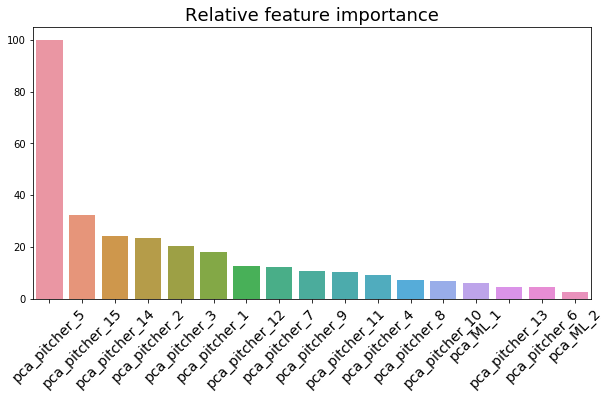

In [66]:
feature_importance = gbc.feature_importances_
feature_importance = 100*feature_importance/feature_importance.max()
feature_importance_dic = {}

i = 0
for col in X.columns:
    feature_importance_dic[col] = feature_importance[i]
    i+=1

feature_importance_dic = sorted(feature_importance_dic.items(), key=lambda x: x[1], reverse=True)

x = [x[0] for x in feature_importance_dic]
y = [x[1] for x in feature_importance_dic]
plt.figure(figsize=(10,5))
sns.barplot(x=x, y=y)
plt.xticks(fontsize=14, rotation=45)
plt.title('Relative feature importance', fontsize=18)
plt.show()

It seems like many features were not used very often. Reducing the features might help with overfitting.

<a name="random-forest"></a>
# Random Forest

In [67]:
rfc = ensemble.RandomForestClassifier(n_estimators=500, max_depth=4)

rfc.fit(X_train, Y_train)

y_preds_train = rfc.predict(X_train)
y_preds_test = rfc.predict(X_test)

matrix_train = pd.crosstab(Y_train, y_preds_train, margins=True)
matrix_test = pd.crosstab(Y_test, y_preds_test, margins=True)
matrix_test

col_0,0,1,All
winner,,,
0,347,101,448
1,177,260,437
All,524,361,885


In [68]:
correct_preds_train = matrix_train.loc[0,0] + matrix_train.loc[1,1]
accuracy_train_set = correct_preds_train/matrix_train.loc['All', 'All']
false_positive_train = matrix_train.loc[1,0]/matrix_train.loc['All', 0]
false_negative_train = matrix_train.loc[0,1]/matrix_train.loc['All', 1]

print('{}% of the predictions were correct training set.'.format(round(accuracy_train_set*100),2))
print('{}% of the positive predictions were incorrect in the training set.'.format(round(false_positive_train*100),2))
print('{}% of the negative predictions were incorrect in the training set.'.format(round(false_negative_train*100),2))
print('-------------------------------------------------------')

correct_preds_test = matrix_test.loc[0,0] + matrix_test.loc[1,1]
accuracy_test_set = correct_preds_test/matrix_test.loc['All', 'All']
false_positive_test = matrix_test.loc[1,0]/matrix_test.loc['All', 0]
false_negative_test = matrix_test.loc[0,1]/matrix_test.loc['All', 1]

print('{}% of the predictions were correct test set.'.format(round(accuracy_test_set*100,1),2))
print('{}% of the positive predictions were incorrect in the test set.'.format(round(false_positive_test*100,1),2))
print('{}% of the negative predictions were incorrect in the test set.'.format(round(false_negative_test*100,1),2))

71.0% of the predictions were correct training set.
30.0% of the positive predictions were incorrect in the training set.
28.0% of the negative predictions were incorrect in the training set.
-------------------------------------------------------
68.6% of the predictions were correct test set.
33.8% of the positive predictions were incorrect in the test set.
28.0% of the negative predictions were incorrect in the test set.


<a name="stacked-model"></a>
# Stacked model

In [69]:
models = [
    BernoulliNB(),
    
    SVC(kernel='rbf', gamma=.01),
    
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=-1),
    
    LogisticRegression(solver='liblinear', penalty='l2'),
    
    ExtraTreesClassifier(n_jobs=-1, n_estimators=150, max_depth=6),
        
    ensemble.RandomForestClassifier(n_estimators=500, max_depth=4),
    
    DecisionTreeClassifier(max_depth=4),
        
    XGBClassifier(n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3),
    
    MLPClassifier(hidden_layer_sizes=(4,)),
    
    ensemble.GradientBoostingClassifier()
]

In [70]:
S_train, S_test = stacking(models,                   
                           X_train, Y_train, X_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=8, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [10]

model  0:     [BernoulliNB]
    fold  0:  [0.67494357]
    fold  1:  [0.64108352]
    fold  2:  [0.65011287]
    fold  3:  [0.64559819]
    fold  4:  [0.67194570]
    fold  5:  [0.62895928]
    fold  6:  [0.65610860]
    fold  7:  [0.63574661]
    ----
    MEAN:     [0.65056229] + [0.01534334]
    FULL:     [0.65056497]

model  1:     [SVC]
    fold  0:  [0.69525959]
    fold  1:  [0.69300226]
    fold  2:  [0.66591422]
    fold  3:  [0.66817156]
    fold  4:  [0.72171946]
    fold  5:  [0.66968326]
    fold  6:  [0.68099548]
    fold  7:  [0.66968326]
    ----
    MEAN:     [0.68305363] + [0.01809700]
    FULL:     [0.68305085]

model  2:     [KNeighborsClassifier]
    fold  0:  [0.60722348]
    fold  1:  [0.62302483]
    fold  2:  [0.60948081]
    fold  3:  [0.61851016]
    fold  4:  [0.63800905]
    fold  5:  [0.61990950]
    fold  6:  [0.60859729]
    fol

//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    fold  4:  [0.73076923]
    fold  5:  [0.66063348]


//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    fold  6:  [0.65610860]
    fold  7:  [0.65610860]
    ----
    MEAN:     [0.67683511] + [0.02493849]
    FULL:     [0.67683616]

model  9:     [GradientBoostingClassifier]
    fold  0:  [0.70428894]
    fold  1:  [0.66817156]
    fold  2:  [0.66817156]
    fold  3:  [0.65688488]
    fold  4:  [0.71945701]
    fold  5:  [0.64932127]
    fold  6:  [0.67194570]
    fold  7:  [0.65610860]
    ----
    MEAN:     [0.67429369] + [0.02312277]
    FULL:     [0.67429379]



In [1578]:
model = BernoulliNB()
    
model = model.fit(S_train, Y_train)
y_preds_test = model.predict(S_test)

matrix_test = pd.crosstab(Y_test, y_preds_test, margins=True)
matrix_test

col_0,0,1,All
winner,,,
0,348,100,448
1,169,268,437
All,517,368,885


# Accuracy of stacked model

In [1487]:
correct_preds_test = matrix_test.loc[0,0] + matrix_test.loc[1,1]
accuracy_test_set = correct_preds_test/matrix_test.loc['All', 'All']
false_positive_test = matrix_test.loc[1,0]/matrix_test.loc['All', 0]
false_negative_test = matrix_test.loc[0,1]/matrix_test.loc['All', 1]

print('{}% of the predictions were correct test set.'.format(round(accuracy_test_set*100,1)))
print('{}% of the positive predictions were incorrect in the test set.'.format(round(false_positive_test*100),2))
print('{}% of the negative predictions were incorrect in the test set.'.format(round(false_negative_test*100),2))

71.1% of the predictions were correct test set.
25.0% of the positive predictions were incorrect in the test set.
34.0% of the negative predictions were incorrect in the test set.


# Summary of models

### Accuracy
- All of the models predicted the test set with around 68-71% accuracy.
- The stacked model performed the best with 71% accuracy. However, all of the other models performed almost as well as the stacked model, and the others might perform better than the stacked model with a different random state.

### Overfitting
- The only overfit model was Grandient Boosting. This can be possible be fixed by hyper tuning the model or reducing the number of features. However, the degree of overfitting may change with a different random state and should be checked with cross validation.

<a name="model-improvement"></a>
# Improving our model using added features

#### It seems like all the different types of models perform about the same. Let's see if we can improve our model by adding some features.

I scraped data from vegasinsider.com to add these features to our dataframe.
1. home_team_overall_wins
2. home_team_overall_losses
3. home_team_home_wins
4. home_team_home_losses
5. home_team_streak
6. away_team_overall_wins
7. away_team_overall_losses
8. away_team_away_wins
9. away_team_away_losses
10. away_team_streak

In [1579]:
added_features = pd.read_csv('2018-2019_team_records_and_streaks.csv')

In [1580]:
added_features.head()

,game_date,away_team,away_team_overall_wins,away_team_overall_losses,away_team_away_wins,away_team_away_losses,away_team_streak,home_team,home_team_overall_wins,home_team_overall_losses,home_team_home_wins,home_team_home_losses,home_team_streak
0,2018-03-29,CHI. CUBS,0,0,0,0,L-2,MIAMI,0,0,0,0,L-2
1,2018-03-29,ST. LOUIS,0,0,0,0,L-1,N.Y. METS,0,0,0,0,W-1
2,2018-03-29,PHILADELPHIA,0,0,0,0,T-1,ATLANTA,0,0,0,0,L-5
3,2018-03-29,MILWAUKEE,0,0,0,0,L-3,SAN DIEGO,0,0,0,0,L-1
4,2018-03-29,SAN FRANCISCO,0,0,0,0,W-1,L.A. DODGERS,0,0,0,0,W-1


In [1581]:
added_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4863 entries, 0 to 4862
Data columns (total 13 columns):
game_date                   4863 non-null object
away_team                   4863 non-null object
away_team_overall_wins      4863 non-null int64
away_team_overall_losses    4863 non-null int64
away_team_away_wins         4863 non-null int64
away_team_away_losses       4863 non-null int64
away_team_streak            4863 non-null object
home_team                   4863 non-null object
home_team_overall_wins      4863 non-null int64
home_team_overall_losses    4863 non-null int64
home_team_home_wins         4863 non-null int64
home_team_home_losses       4863 non-null int64
home_team_streak            4863 non-null object
dtypes: int64(8), object(5)
memory usage: 494.0+ KB


In [1582]:
# Let's change game_date to DateTime

added_features['game_date'] = pd.to_datetime(added_features['game_date'])

In [1583]:
added_features.describe(include='all')

,game_date,away_team,away_team_overall_wins,away_team_overall_losses,away_team_away_wins,away_team_away_losses,away_team_streak,home_team,home_team_overall_wins,home_team_overall_losses,home_team_home_wins,home_team_home_losses,home_team_streak
count,4863,4863,4863.000000,4863.000000,4863.000000,4863.000000,4863,4863,4863.000000,4863.000000,4863.000000,4863.000000,4863
unique,365,30,NaN,NaN,NaN,NaN,23,30,NaN,NaN,NaN,NaN,23
top,2018-05-19 00:00:00,MINNESOTA,NaN,NaN,NaN,NaN,W-1,N.Y. YANKEES,NaN,NaN,NaN,NaN,W-1
freq,17,164,NaN,NaN,NaN,NaN,1193,166,NaN,NaN,NaN,NaN,1205
first,2018-03-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-09-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,40.237713,40.227020,19.029406,20.939749,NaN,NaN,40.212420,40.243060,20.935842,19.034341,NaN
std,NaN,NaN,24.976382,24.914017,11.934267,13.252751,NaN,NaN,24.932437,24.975927,13.441419,12.098367,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,19.000000,19.000000,9.000000,10.000000,NaN,NaN,20.000000,19.000000,10.000000,9.000000,NaN


First I am going to change the team names so they are the same format as the df.

In [1584]:
teams_dic = {'ARIZONA': 'ARIZONA DIAMONDBACKS', 'ATLANTA': 'ATLANTA BRAVES', 'BALTIMORE': 'BALTIMORE ORIOLES',
 'BOSTON': 'BOSTON RED SOX', 'CHI. CUBS': 'CHICAGO CUBS', 'CINCINNATI': 'CINCINNATI REDS',
 'CLEVELAND': 'CLEVELAND INDIANS', 'COLORADO': 'COLORADO ROCKIES', 'CHI. WHITE SOX': 'CHICAGO WHITE SOX',
 'DETROIT': 'DETROIT TIGERS', 'HOUSTON': 'HOUSTON ASTROS', 'KANSAS CITY': 'KANSAS CITY ROYALS',
 'L.A. ANGELS': 'LOS ANGELES ANGELS', 'L.A. DODGERS': 'LOS ANGELES DODGERS', 'MIAMI': 'MIAMI MARLINS',
 'MILWAUKEE': 'MILWAUKEE BREWERS', 'MINNESOTA': 'MINNESOTA TWINS', 'N.Y. METS': 'NEW YORK METS',
 'N.Y. YANKEES': 'NEW YORK YANKEES', 'OAKLAND': 'OAKLAND ATHLETICS', 'PHILADELPHIA': 'PHILADELPHIA PHILLIES',
 'PITTSBURGH': 'PITTSBURGH PIRATES', 'SAN DIEGO': 'SAN DIEGO PADRES', 'SEATTLE': 'SEATTLE MARINERS',
 'SAN FRANCISCO': 'SAN FRANCISCO GIANTS', 'ST. LOUIS': 'ST. LOUIS CARDINALS', 'TAMPA BAY': 'TAMPA BAY RAYS',
 'TEXAS': 'TEXAS RANGERS', 'TORONTO': 'TORONTO BLUE JAYS', 'WASHINGTON': 'WASHINGTON NATIONALS'}

In [1585]:
# Changing team names in added_features to the same format as the original df

def home_team_names(s):
    return teams_dic[s['home_team']]
def away_team_names(s):
    return teams_dic[s['away_team']]

added_features['home_team'] = added_features.apply(home_team_names, axis=1)
added_features['away_team'] = added_features.apply(away_team_names, axis=1)

In [1586]:
# Let's add another column which indicated if a game is a double header
# I am creating a double_header column in added_features
# 0 indicates NOT a double header
# 1 indicates 1st game of double header
# 2 indicates 2nd game of double header

added_features['double_header'] = pd.Series()

for ind in added_features.index:
    temp = added_features.index[(added_features['game_date'] == added_features.loc[ind, 'game_date'])
                 & (added_features['home_team'] == added_features.loc[ind, 'home_team'])
                 & (added_features['away_team'] == added_features.loc[ind, 'away_team'])]
    
    if len(temp) == 1:
        added_features.loc[temp[0], 'double_header'] = 0

    if len(temp) == 2:
        added_features.loc[temp[0], 'double_header'] = 1
        added_features.loc[temp[1], 'double_header'] = 2

In [1587]:
# Converting winning streaks to integers

for index in added_features.index:
    if added_features.loc[index, 'home_team_streak'].split('-')[0] == 'L':
        added_features.loc[index, 'home_team_streak'] = -int(added_features.loc[index, 'home_team_streak'].split('-')[1])
    elif added_features.loc[index, 'home_team_streak'].split('-')[0] == 'W':
        added_features.loc[index, 'home_team_streak'] = int(added_features.loc[index, 'home_team_streak'].split('-')[1])
    else:
        added_features.loc[index, 'home_team_streak'] = int(0)
    if added_features.loc[index, 'away_team_streak'].split('-')[0] == 'L':
        added_features.loc[index, 'away_team_streak'] = -int(added_features.loc[index, 'away_team_streak'].split('-')[1])
    elif added_features.loc[index, 'away_team_streak'].split('-')[0] == 'W':
        added_features.loc[index, 'away_team_streak'] = int(added_features.loc[index, 'away_team_streak'].split('-')[1])
    else:
        added_features.loc[index, 'away_team_streak'] = int(0)

In [1588]:
# creating a team win percentage columns
added_features['home_team_overall_winpct'] = added_features['home_team_overall_wins'] / (added_features['home_team_overall_wins'] + added_features['home_team_overall_losses'])
added_features['home_team_home_winpct'] = added_features['home_team_home_wins'] / (added_features['home_team_home_wins'] + added_features['home_team_home_losses'])
added_features['away_team_overall_winpct'] = added_features['away_team_overall_wins'] / (added_features['away_team_overall_wins'] + added_features['away_team_overall_losses'])
added_features['away_team_away_winpct'] = added_features['away_team_away_wins'] / (added_features['away_team_away_wins'] + added_features['away_team_away_losses'])

for index in added_features.index:
    if np.isnan(added_features.loc[index, 'home_team_overall_winpct']):
        added_features.loc[index, 'home_team_overall_winpct'] = 0
    if np.isnan(added_features.loc[index, 'home_team_home_winpct']):
        added_features.loc[index, 'home_team_home_winpct'] = 0
    if np.isnan(added_features.loc[index, 'away_team_overall_winpct']):
        added_features.loc[index, 'away_team_overall_winpct'] = 0
    if np.isnan(added_features.loc[index, 'away_team_away_winpct']):
        added_features.loc[index, 'away_team_away_winpct'] = 0

In [1589]:
added_features['overall_win_diff'] = added_features['home_team_overall_wins'] - added_features['away_team_overall_wins']
added_features['home_away_win_diff'] = added_features['home_team_home_wins'] - added_features['away_team_away_wins']
added_features['home_away_loss_diff'] = added_features['home_team_home_losses'] - added_features['away_team_away_losses']
added_features['overall_win_pct_diff'] = added_features['home_team_overall_winpct'] - added_features['away_team_overall_winpct']
added_features['home_away_win_pct_diff'] = added_features['home_team_home_winpct'] - added_features['away_team_away_winpct']
added_features['win_streak_diff'] = added_features['home_team_streak'] - added_features['away_team_streak']

# Outliers for added features

In [1590]:
columns = ['away_team_overall_wins', 'away_team_overall_losses', 'away_team_away_wins', 'away_team_away_losses',
           'away_team_streak', 'home_team_overall_wins', 'home_team_overall_losses', 'home_team_home_wins',
           'home_team_home_losses', 'home_team_streak', 'home_team_overall_winpct', 'home_team_home_winpct',
           'away_team_overall_winpct', 'away_team_away_winpct', 'overall_win_diff', 'home_away_win_diff',
           'home_away_loss_diff', 'overall_win_pct_diff', 'home_away_win_pct_diff', 'win_streak_diff']


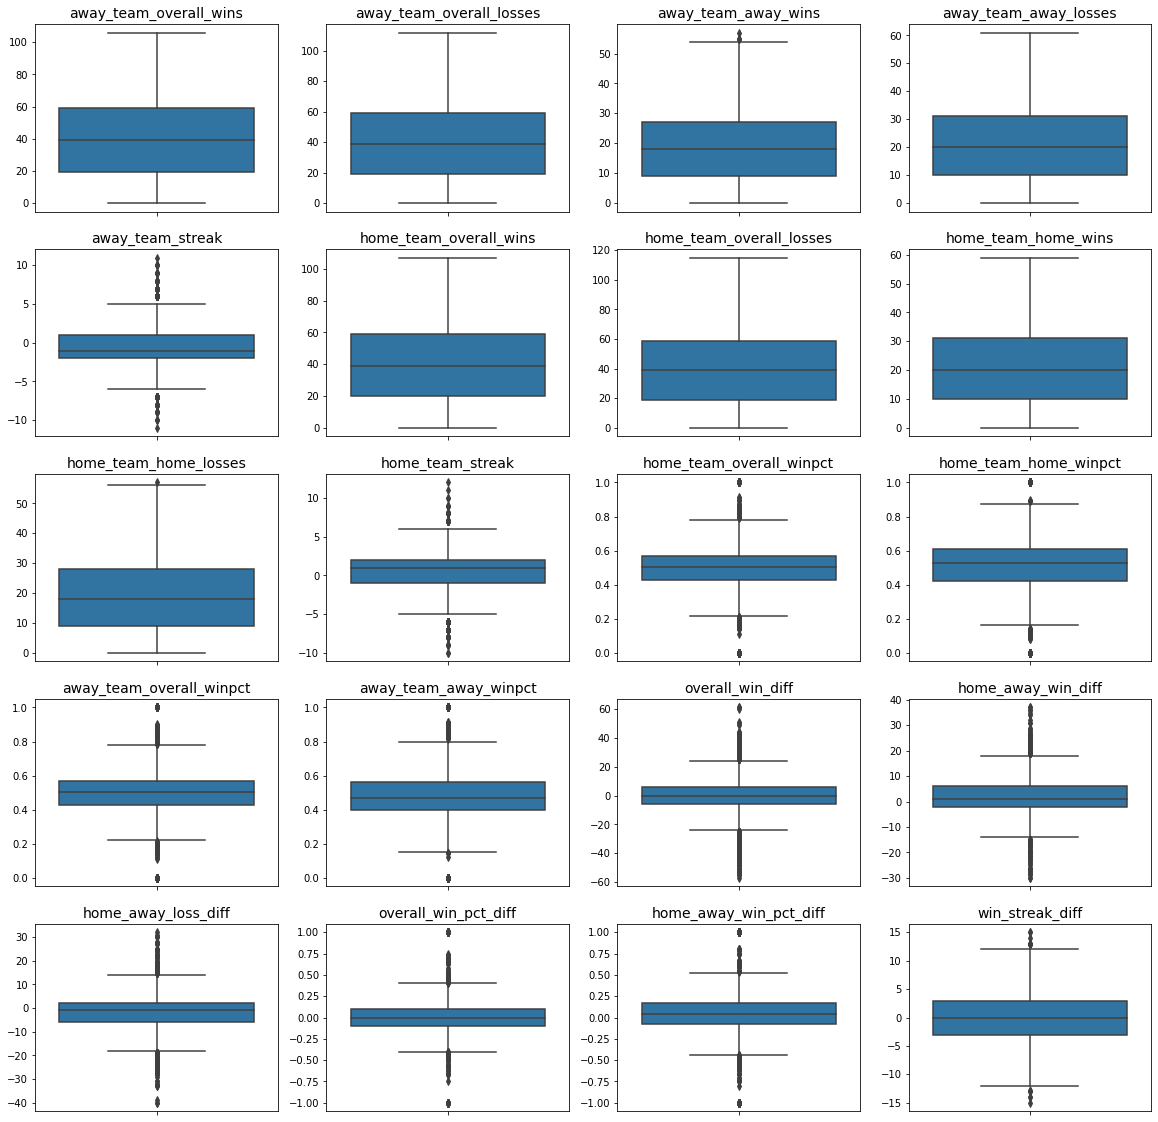

In [1591]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=.2)

i = 1
for col in columns:
    plt.subplot(5,4,i)
    sns.boxplot(y=added_features[col])
    plt.title(col, fontsize=14)
    plt.ylabel('')
    i += 1
plt.show()

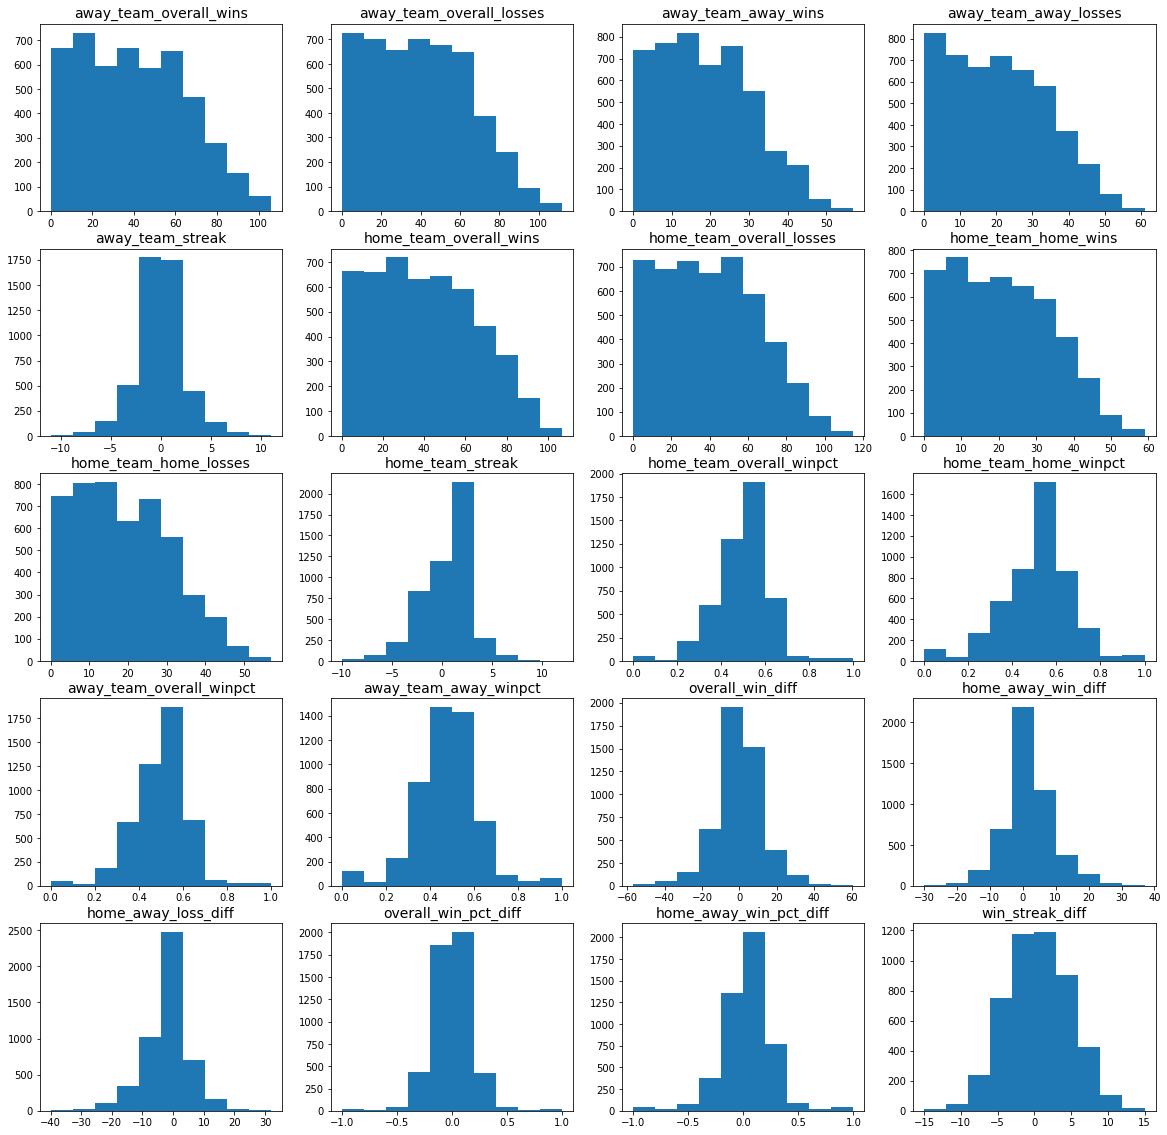

In [1592]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=.2)

i = 1
for col in columns:
    plt.subplot(5,4,i)
    plt.hist(added_features[col])
    plt.title(col, fontsize=14)
    plt.ylabel('')
    i += 1
plt.show()

# Making distributions more normal using root transformations

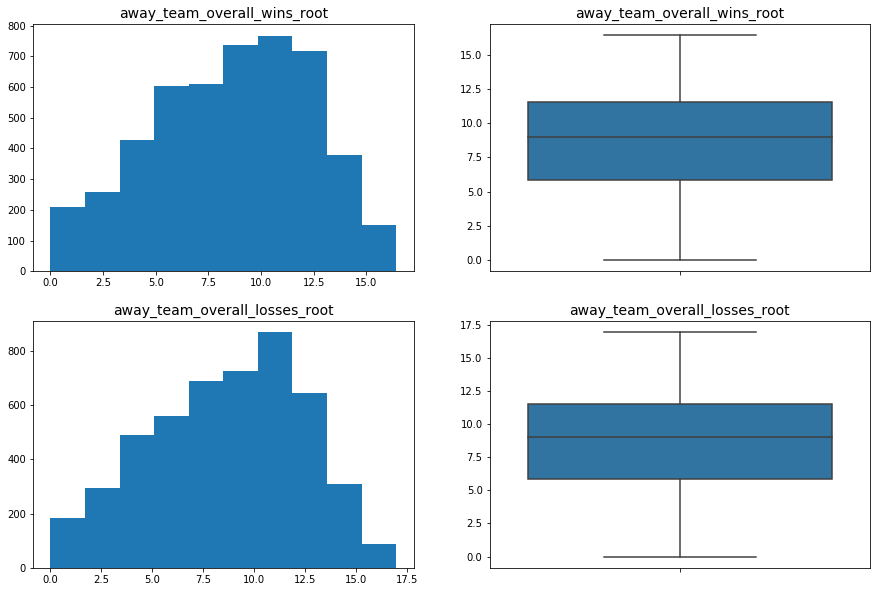

In [1593]:
added_features['away_team_overall_wins_root'] = added_features['away_team_overall_wins']**.6
added_features['away_team_overall_losses_root'] = added_features['away_team_overall_losses']**.6

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(added_features['away_team_overall_wins_root'])
plt.title('away_team_overall_wins_root', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,2)
sns.boxplot(y = added_features['away_team_overall_wins_root'])
plt.title('away_team_overall_wins_root', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,3)
plt.hist(added_features['away_team_overall_losses_root'])
plt.title('away_team_overall_losses_root', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,4)
sns.boxplot(y = added_features['away_team_overall_losses_root'])
plt.title('away_team_overall_losses_root', fontsize=14)
plt.ylabel('')

plt.show()

### The distributions appear much more normal

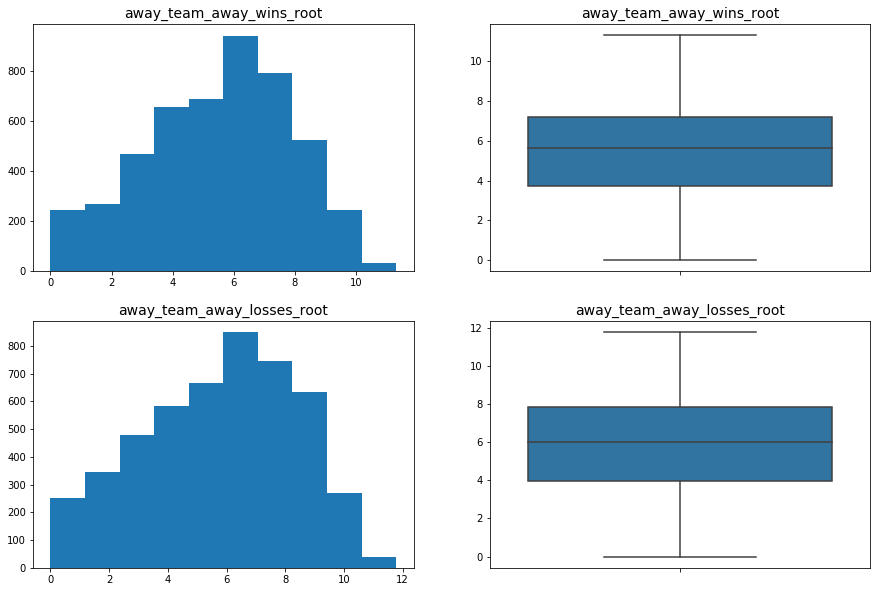

In [1594]:
added_features['away_team_away_wins_root'] = added_features['away_team_away_wins']**.6
added_features['away_team_away_losses_root'] = added_features['away_team_away_losses']**.6

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(added_features['away_team_away_wins_root'])
plt.title('away_team_away_wins_root', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,2)
sns.boxplot(y = added_features['away_team_away_wins_root'])
plt.title('away_team_away_wins_root', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,3)
plt.hist(added_features['away_team_away_losses_root'])
plt.title('away_team_away_losses_root', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,4)
sns.boxplot(y = added_features['away_team_away_losses_root'])
plt.title('away_team_away_losses_root', fontsize=14)
plt.ylabel('')

plt.show()

### The distributions appear much more normal

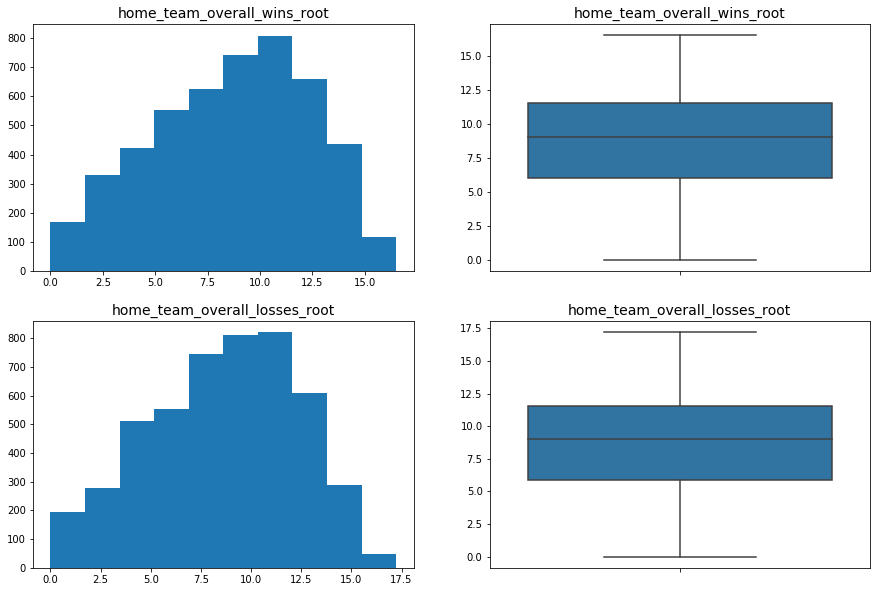

In [1595]:
added_features['home_team_overall_wins_root'] = added_features['home_team_overall_wins']**.6
added_features['home_team_overall_losses_root'] = added_features['home_team_overall_losses']**.6

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(added_features['home_team_overall_wins_root'])
plt.title('home_team_overall_wins_root', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,2)
sns.boxplot(y = added_features['home_team_overall_wins_root'])
plt.title('home_team_overall_wins_root', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,3)
plt.hist(added_features['home_team_overall_losses_root'])
plt.title('home_team_overall_losses_root', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,4)
sns.boxplot(y = added_features['home_team_overall_losses_root'])
plt.title('home_team_overall_losses_root', fontsize=14)
plt.ylabel('')

plt.show()

### The distributions appear much more normal

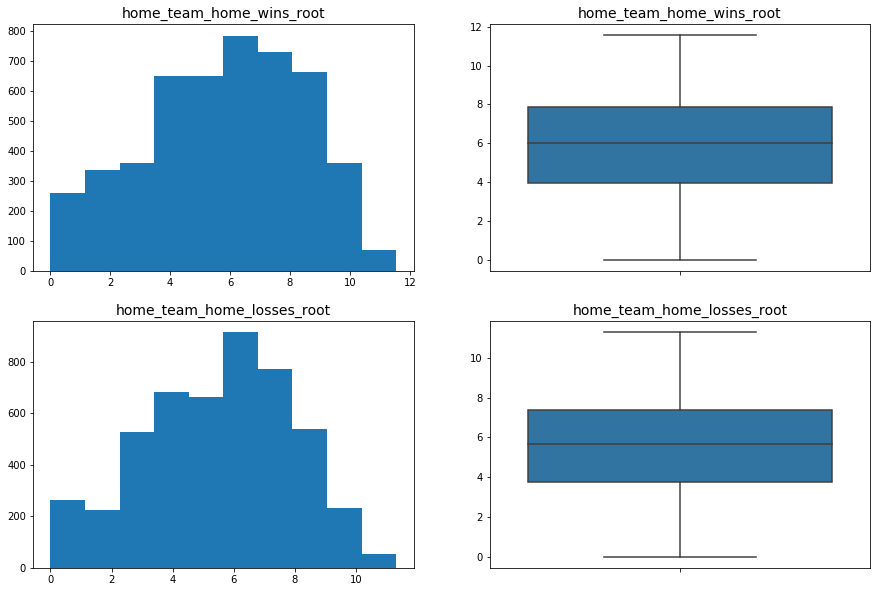

In [1596]:
added_features['home_team_home_wins_root'] = added_features['home_team_home_wins']**.6
added_features['home_team_home_losses_root'] = added_features['home_team_home_losses']**.6

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(added_features['home_team_home_wins_root'])
plt.title('home_team_home_wins_root', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,2)
sns.boxplot(y = added_features['home_team_home_wins_root'])
plt.title('home_team_home_wins_root', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,3)
plt.hist(added_features['home_team_home_losses_root'])
plt.title('home_team_home_losses_root', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,4)
sns.boxplot(y = added_features['home_team_home_losses_root'])
plt.title('home_team_home_losses_root', fontsize=14)
plt.ylabel('')

plt.show()### The distributions appear much more normal### The distributions appear much more normal

### The distributions appear much more normal

# Handling outliers for winning streaks using winsorization

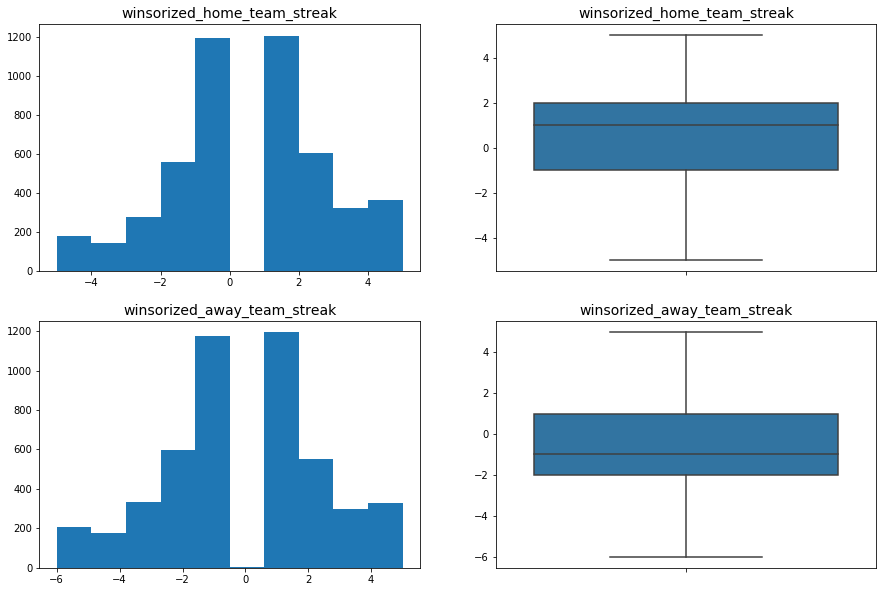

In [1597]:
winsorize_col('home_team_streak', added_features)
winsorize_col('away_team_streak', added_features)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(added_features['winsorized_home_team_streak'])
plt.title('winsorized_home_team_streak', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,2)
sns.boxplot(y = added_features['winsorized_home_team_streak'])
plt.title('winsorized_home_team_streak', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,3)
plt.hist(added_features['winsorized_away_team_streak'])
plt.title('winsorized_away_team_streak', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,4)
sns.boxplot(y = added_features['winsorized_away_team_streak'])
plt.title('winsorized_away_team_streak', fontsize=14)
plt.ylabel('')


plt.show()

It's not possible to have a winning streak equal to 0

# Handling outliers for win pct. using winsorization

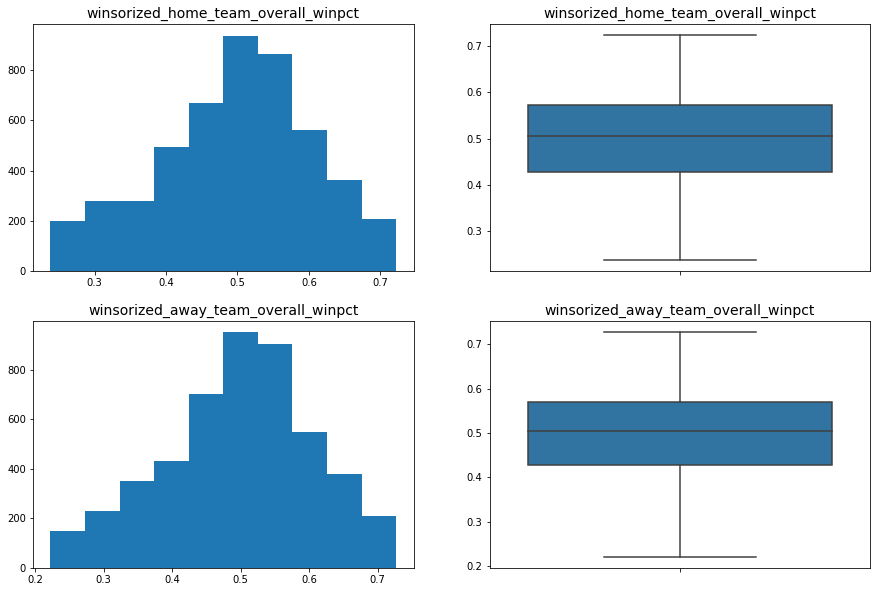

In [1598]:
winsorize_col('home_team_overall_winpct', added_features)
winsorize_col('away_team_overall_winpct', added_features)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(added_features['winsorized_home_team_overall_winpct'])
plt.title('winsorized_home_team_overall_winpct', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,2)
sns.boxplot(y = added_features['winsorized_home_team_overall_winpct'])
plt.title('winsorized_home_team_overall_winpct', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,3)
plt.hist(added_features['winsorized_away_team_overall_winpct'])
plt.title('winsorized_away_team_overall_winpct', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,4)
sns.boxplot(y = added_features['winsorized_away_team_overall_winpct'])
plt.title('winsorized_away_team_overall_winpct', fontsize=14)
plt.ylabel('')


plt.show()

# Handling outliers for (home/away) win pct. using winsorization

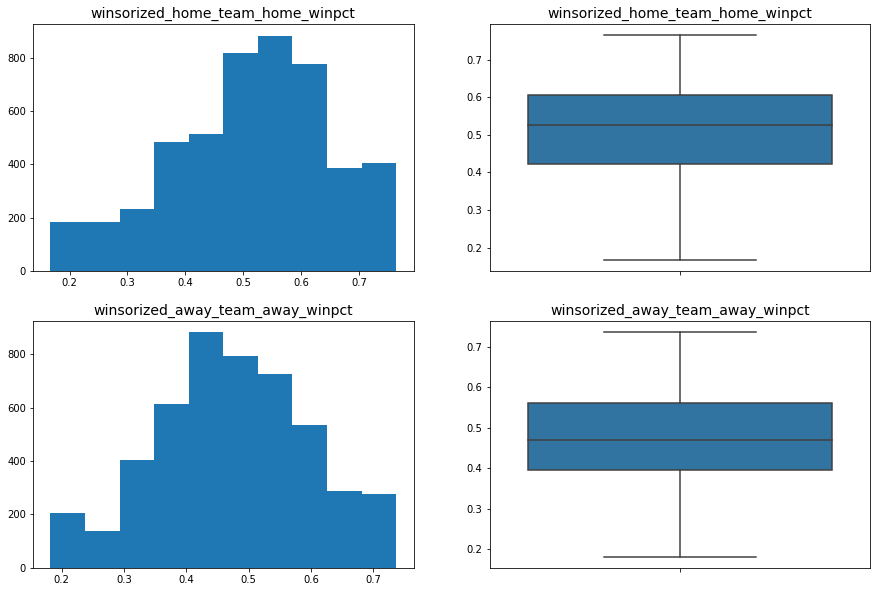

In [1599]:
winsorize_col('home_team_home_winpct', added_features)
winsorize_col('away_team_away_winpct', added_features)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(added_features['winsorized_home_team_home_winpct'])
plt.title('winsorized_home_team_home_winpct', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,2)
sns.boxplot(y = added_features['winsorized_home_team_home_winpct'])
plt.title('winsorized_home_team_home_winpct', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,3)
plt.hist(added_features['winsorized_away_team_away_winpct'])
plt.title('winsorized_away_team_away_winpct', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,4)
sns.boxplot(y = added_features['winsorized_away_team_away_winpct'])
plt.title('winsorized_away_team_away_winpct', fontsize=14)
plt.ylabel('')


plt.show()

# Handling outliers for win diff using winsorization

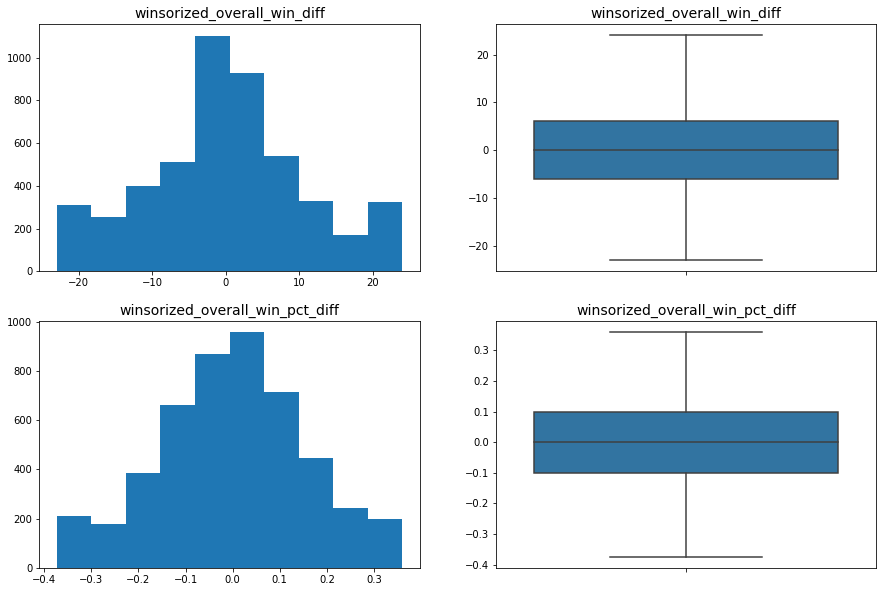

In [1600]:
winsorize_col('overall_win_diff', added_features)
winsorize_col('overall_win_pct_diff', added_features)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(added_features['winsorized_overall_win_diff'])
plt.title('winsorized_overall_win_diff', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,2)
sns.boxplot(y = added_features['winsorized_overall_win_diff'])
plt.title('winsorized_overall_win_diff', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,3)
plt.hist(added_features['winsorized_overall_win_pct_diff'])
plt.title('winsorized_overall_win_pct_diff', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,4)
sns.boxplot(y = added_features['winsorized_overall_win_pct_diff'])
plt.title('winsorized_overall_win_pct_diff', fontsize=14)
plt.ylabel('')


plt.show()

# Handling outliers for (home/away) win and loss diff using winsorization

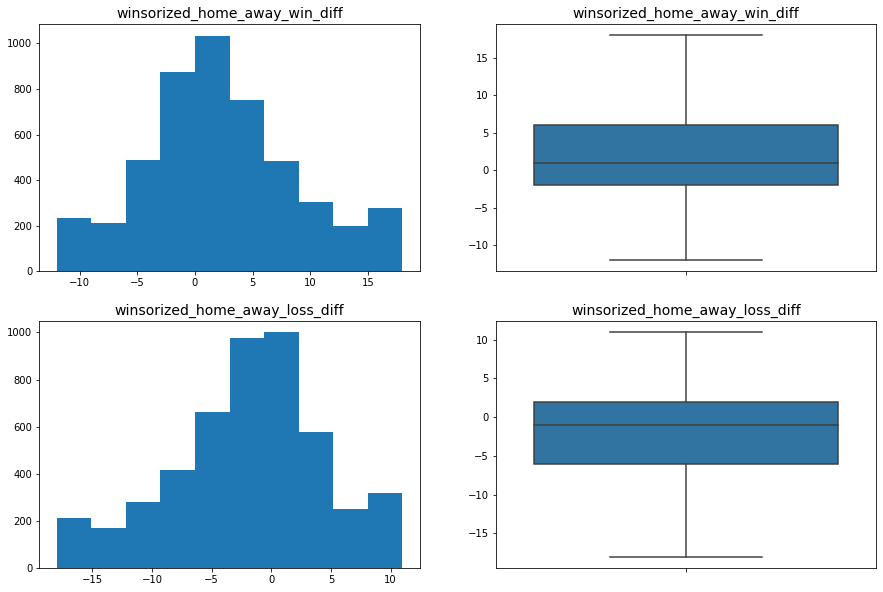

In [1601]:
winsorize_col('home_away_win_diff', added_features)
winsorize_col('home_away_loss_diff', added_features)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(added_features['winsorized_home_away_win_diff'])
plt.title('winsorized_home_away_win_diff', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,2)
sns.boxplot(y = added_features['winsorized_home_away_win_diff'])
plt.title('winsorized_home_away_win_diff', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,3)
plt.hist(added_features['winsorized_home_away_loss_diff'])
plt.title('winsorized_home_away_loss_diff', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,4)
sns.boxplot(y = added_features['winsorized_home_away_loss_diff'])
plt.title('winsorized_home_away_loss_diff', fontsize=14)
plt.ylabel('')


plt.show()

# Handling outliers for (home/away) win pct. and winning streak

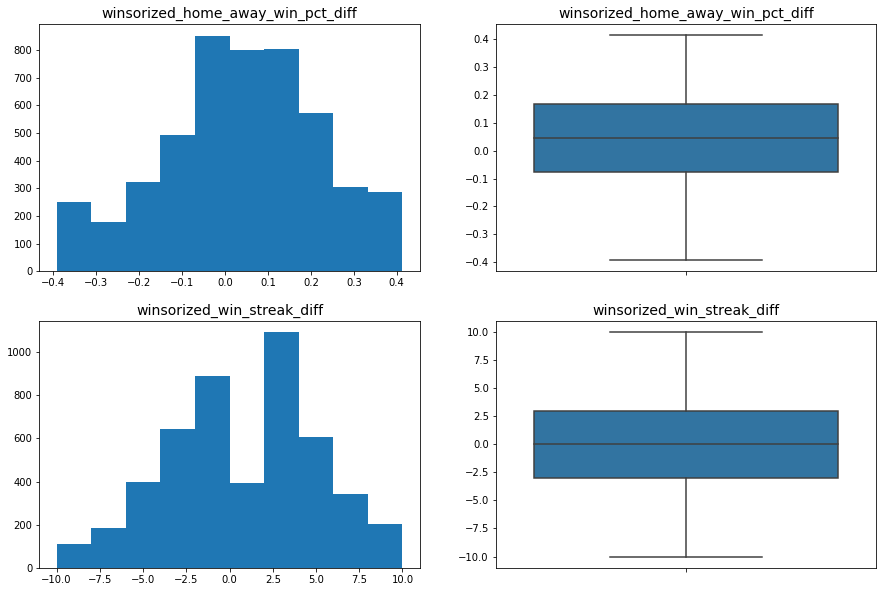

In [1602]:
winsorize_col('home_away_win_pct_diff', added_features)
winsorize_col('win_streak_diff', added_features)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(added_features['winsorized_home_away_win_pct_diff'])
plt.title('winsorized_home_away_win_pct_diff', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,2)
sns.boxplot(y = added_features['winsorized_home_away_win_pct_diff'])
plt.title('winsorized_home_away_win_pct_diff', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,3)
plt.hist(added_features['winsorized_win_streak_diff'])
plt.title('winsorized_win_streak_diff', fontsize=14)
plt.ylabel('')

plt.subplot(2,2,4)
sns.boxplot(y = added_features['winsorized_win_streak_diff'])
plt.title('winsorized_win_streak_diff', fontsize=14)
plt.ylabel('')


plt.show()

In [1603]:
# Now let's merge all of the added columns to the original dataframe
df = df.merge(added_features,
                left_on=['date', 'away_team', 'home_team', 'double_header'],
                right_on=['game_date', 'away_team', 'home_team', 'double_header'],
                how='left')

# Let's check for missing values after merging added features

In [1604]:
df.isnull().sum().tail()

winsorized_overall_win_pct_diff      14
winsorized_home_away_win_diff        14
winsorized_home_away_loss_diff       14
winsorized_home_away_win_pct_diff    14
winsorized_win_streak_diff           14
dtype: int64

14 out of 4500 rows having missing values after merging. I will drop these rows, because dropping such a small amount should have no impact on our final model.

In [1605]:
# dropping rows that have missing values

df.dropna(inplace=True)

Now let's see which added features have the most significant difference on whether a team wins or loses.
I am using a t-test with each feature to measure the difference. The t-test will consist of two groups.
Group 1 will be the added feature values when the home team wins. Group 2 will be the added feature values when the home team loses.

In [1607]:
new_features = ['away_team_overall_wins', 'away_team_overall_losses',
       'away_team_away_wins', 'away_team_away_losses', 'away_team_streak',
       'home_team_overall_wins', 'home_team_overall_losses',
       'home_team_home_wins', 'home_team_home_losses', 'home_team_streak',
       'home_team_overall_winpct', 'home_team_home_winpct',
       'away_team_overall_winpct', 'away_team_away_winpct', 'overall_win_diff',
       'home_away_win_diff', 'home_away_loss_diff', 'overall_win_pct_diff',
       'home_away_win_pct_diff', 'win_streak_diff',
       'away_team_overall_wins_root', 'away_team_overall_losses_root',
       'away_team_away_wins_root', 'away_team_away_losses_root',
       'home_team_overall_wins_root', 'home_team_overall_losses_root',
       'home_team_home_wins_root', 'home_team_home_losses_root',
       'winsorized_home_team_streak', 'winsorized_away_team_streak',
       'winsorized_home_team_overall_winpct',
       'winsorized_away_team_overall_winpct',
       'winsorized_home_team_home_winpct', 'winsorized_away_team_away_winpct',
       'winsorized_overall_win_diff', 'winsorized_overall_win_pct_diff',
       'winsorized_home_away_win_diff', 'winsorized_home_away_loss_diff',
       'winsorized_home_away_win_pct_diff', 'winsorized_win_streak_diff']

t_test = {}
print('home team wins (group 1) vs. home team loses (group 2):')
print('t-test and p-values')
for feature in new_features:
    x = df[df['winner'] == 0][feature]
    y = df[df['winner'] == 1][feature]
    t_test[feature] = ttest_ind(x, y)
sorted(t_test.items(), key = lambda x: x[1][1])

home team wins (group 1) vs. home team loses (group 2):
t-test and p-values


[('winsorized_overall_win_diff',
  Ttest_indResult(statistic=12.224251225147176, pvalue=8.091460739658939e-34)),
 ('overall_win_diff',
  Ttest_indResult(statistic=12.218719848548698, pvalue=8.64194523490482e-34)),
 ('winsorized_overall_win_pct_diff',
  Ttest_indResult(statistic=11.030102113269741, pvalue=6.322161380610353e-28)),
 ('winsorized_home_away_loss_diff',
  Ttest_indResult(statistic=-10.897827314409275, pvalue=2.6242411186847115e-27)),
 ('home_away_loss_diff',
  Ttest_indResult(statistic=-10.802389311958693, pvalue=7.255774817385807e-27)),
 ('winsorized_home_away_win_diff',
  Ttest_indResult(statistic=10.758526312311835, pvalue=1.1546861992690674e-26)),
 ('home_away_win_diff',
  Ttest_indResult(statistic=10.69375108085225, pvalue=2.2858372989684233e-26)),
 ('winsorized_home_away_win_pct_diff',
  Ttest_indResult(statistic=9.366396867359288, pvalue=1.165904068763824e-20)),
 ('overall_win_pct_diff',
  Ttest_indResult(statistic=9.154634840837609, pvalue=8.158252187234882e-20)),
 (

Most of the features show a significant difference with our target.

#### Let's see if they are correlated with each other before adding them to our model.

In [1608]:
df[['winsorized_overall_win_diff', 'winsorized_overall_win_pct_diff', 'winsorized_home_away_loss_diff',
    'winsorized_home_away_win_diff', 'winsorized_home_away_win_pct_diff', 'winsorized_away_team_overall_winpct',
    'winsorized_home_team_home_winpct', 'winsorized_home_team_overall_winpct', 'winsorized_away_team_away_winpct',
    'winsorized_away_team_streak', 'winsorized_win_streak_diff',
    'away_team_overall_losses', 'home_team_home_wins', 'home_team_overall_wins']].corr()

,winsorized_overall_win_diff,winsorized_overall_win_pct_diff,winsorized_home_away_loss_diff,winsorized_home_away_win_diff,winsorized_home_away_win_pct_diff,winsorized_away_team_overall_winpct,winsorized_home_team_home_winpct,winsorized_home_team_overall_winpct,winsorized_away_team_away_winpct,winsorized_away_team_streak,winsorized_win_streak_diff,away_team_overall_losses,home_team_home_wins,home_team_overall_wins
winsorized_overall_win_diff,1.000000,0.791051,-0.829122,0.833557,0.667830,-0.572321,0.483867,0.575604,-0.468332,-0.301387,0.337083,0.251089,0.251026,0.251321
winsorized_overall_win_pct_diff,0.791051,1.000000,-0.678738,0.664425,0.823167,-0.739060,0.613671,0.729547,-0.604453,-0.347866,0.386200,0.195884,0.197929,0.195903
winsorized_home_away_loss_diff,-0.829122,-0.678738,1.000000,-0.913157,-0.765468,0.456071,-0.582768,-0.528613,0.506910,0.307477,-0.352708,-0.407045,-0.463310,-0.422736
winsorized_home_away_win_diff,0.833557,0.664425,-0.913157,1.000000,0.768771,-0.448558,0.580678,0.515381,-0.511257,-0.301379,0.350206,0.393088,0.478895,0.415998
winsorized_home_away_win_pct_diff,0.667830,0.823167,-0.765468,0.768771,1.000000,-0.581030,0.757470,0.632291,-0.695495,-0.361278,0.415320,0.233552,0.299614,0.251058
winsorized_away_team_overall_winpct,-0.572321,-0.739060,0.456071,-0.448558,-0.581030,1.000000,-0.097623,-0.097302,0.817600,0.340666,-0.281540,-0.225353,0.015856,0.020248
winsorized_home_team_home_winpct,0.483867,0.613671,-0.582768,0.580678,0.757470,-0.097623,1.000000,0.823156,-0.090237,-0.207031,0.317117,0.128628,0.396720,0.334464
winsorized_home_team_overall_winpct,0.575604,0.729547,-0.528613,0.515381,0.632291,-0.097302,0.823156,1.000000,-0.081208,-0.170799,0.286529,0.047615,0.297503,0.298551
winsorized_away_team_away_winpct,-0.468332,-0.604453,0.506910,-0.511257,-0.695495,0.817600,-0.090237,-0.081208,1.000000,0.330029,-0.290602,-0.207444,-0.009122,-0.004787
winsorized_away_team_streak,-0.301387,-0.347866,0.307477,-0.301379,-0.361278,0.340666,-0.207031,-0.170799,0.330029,1.000000,-0.876821,-0.107511,-0.078871,-0.068417


Because of intercorrelation between many features, I will use pca.

# PCA (added features)

In [1609]:
X = df[['winsorized_overall_win_diff', 'winsorized_overall_win_pct_diff', 'winsorized_home_away_loss_diff',
    'winsorized_home_away_win_diff', 'winsorized_home_away_win_pct_diff', 'winsorized_away_team_overall_winpct',
    'winsorized_home_team_home_winpct', 'winsorized_home_team_overall_winpct', 'winsorized_away_team_away_winpct',
    'winsorized_away_team_streak', 'winsorized_win_streak_diff',
    'away_team_overall_losses', 'home_team_home_wins', 'home_team_overall_wins']]

X = StandardScaler().fit_transform(X)

pca = PCA(n_components=14)
pca.fit(X)
pca_data = pca.transform(X)
df['pca_added_features_1'] = [x[0] for x in pca_data]
df['pca_added_features_2'] = [x[1] for x in pca_data]
df['pca_added_features_3'] = [x[2] for x in pca_data]
df['pca_added_features_4'] = [x[3] for x in pca_data]
df['pca_added_features_5'] = [x[4] for x in pca_data]
df['pca_added_features_6'] = [x[5] for x in pca_data]
df['pca_added_features_7'] = [x[6] for x in pca_data]
df['pca_added_features_8'] = [x[7] for x in pca_data]
df['pca_added_features_9'] = [x[8] for x in pca_data]
df['pca_added_features_10'] = [x[9] for x in pca_data]
df['pca_added_features_11'] = [x[10] for x in pca_data]
df['pca_added_features_12'] = [x[11] for x in pca_data]
df['pca_added_features_13'] = [x[12] for x in pca_data]
df['pca_added_features_14'] = [x[13] for x in pca_data]
pca.explained_variance_ratio_

array([4.79998656e-01, 1.86714028e-01, 1.17735585e-01, 1.01479845e-01,
       4.34896097e-02, 3.23247554e-02, 1.29738290e-02, 8.00908806e-03,
       6.57202979e-03, 5.22565311e-03, 3.46469993e-03, 1.23661738e-03,
       4.00442447e-04, 3.75161249e-04])

## Naive Bayes Model with added features

In [1610]:
# X is our original and added features
X = df[['pca_pitcher_1', 'pca_pitcher_2', 'pca_pitcher_3', 'pca_pitcher_4', 'pca_pitcher_5', 'pca_pitcher_6',
        'pca_pitcher_7', 'pca_pitcher_8', 'pca_pitcher_9', 'pca_pitcher_10', 'pca_pitcher_11', 'pca_pitcher_12',
        'pca_pitcher_13', 'pca_pitcher_14', 'pca_pitcher_15', 'pca_ML_1', 'pca_ML_2', 'pca_added_features_1',
        'pca_added_features_2', 'pca_added_features_3', 'pca_added_features_4', 'pca_added_features_5',
        'pca_added_features_6', 'pca_added_features_7', 'pca_added_features_8', 'pca_added_features_9',
        'pca_added_features_10']]

# Y is our target
Y = df['winner']

X_std=StandardScaler().fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size=.2, random_state=200)


nb = BernoulliNB()

nb.fit(X_train, Y_train)

y_preds_train = nb.predict(X_train)
y_preds_test = nb.predict(X_test)

matrix_train = pd.crosstab(Y_train, y_preds_train, margins=True)
matrix_test = pd.crosstab(Y_test, y_preds_test, margins=True)
matrix_test

col_0,0,1,All
winner,,,
0,376,133,509
1,136,238,374
All,512,371,883


In [1611]:
correct_preds_train = matrix_train.loc[0,0] + matrix_train.loc[1,1]
accuracy_train_set = correct_preds_train/matrix_train.loc['All', 'All']
false_positive_train = matrix_train.loc[1,0]/matrix_train.loc['All', 0]
false_negative_train = matrix_train.loc[0,1]/matrix_train.loc['All', 1]

print('{}% of the predictions were correct training set.'.format(round(accuracy_train_set*100),2))
print('{}% of the home team predictions were incorrect in the training set.'.format(round(false_positive_train*100),2))
print('{}% of the away predictions were incorrect in the training set.'.format(round(false_negative_train*100),2))
print('-------------------------------------------------------')

correct_preds_test = matrix_test.loc[0,0] + matrix_test.loc[1,1]
accuracy_test_set = correct_preds_test/matrix_test.loc['All', 'All']
false_positive_test = matrix_test.loc[1,0]/matrix_test.loc['All', 0]
false_negative_test = matrix_test.loc[0,1]/matrix_test.loc['All', 1]

print('{}% of the predictions were correct test set.'.format(round(accuracy_test_set*100),2))
print('{}% of the positive predictions were incorrect in the test set.'.format(round(false_positive_test*100),2))
print('{}% of the negative predictions were incorrect in the test set.'.format(round(false_negative_test*100),2))

66.0% of the predictions were correct training set.
34.0% of the home team predictions were incorrect in the training set.
35.0% of the away predictions were incorrect in the training set.
-------------------------------------------------------
70.0% of the predictions were correct test set.
27.0% of the positive predictions were incorrect in the test set.
36.0% of the negative predictions were incorrect in the test set.


The naive bayes model with added features performs almost identical to the Naive Bayes without the added features.

<a name="logistic-regression-added-features"></a>
#  Logistic Regression with added features

In [1612]:
lrc = LogisticRegression(solver='liblinear', penalty='l2')

lrc.fit(X_train, Y_train)

y_preds_train = lrc.predict(X_train)
y_preds_test = lrc.predict(X_test)

matrix_train = pd.crosstab(Y_train, y_preds_train, margins=True)
matrix_test = pd.crosstab(Y_test, y_preds_test, margins=True)
matrix_test

col_0,0,1,All
winner,,,
0,374,135,509
1,137,237,374
All,511,372,883


In [1613]:
correct_preds_train = matrix_train.loc[0,0] + matrix_train.loc[1,1]
accuracy_train_set = correct_preds_train/matrix_train.loc['All', 'All']
false_positive_train = matrix_train.loc[1,0]/matrix_train.loc['All', 0]
false_negative_train = matrix_train.loc[0,1]/matrix_train.loc['All', 1]

print('{}% of the predictions were correct training set.'.format(round(accuracy_train_set*100),2))
print('{}% of the home team predictions were incorrect in the training set.'.format(round(false_positive_train*100),2))
print('{}% of the away predictions were incorrect in the training set.'.format(round(false_negative_train*100),2))
print('-------------------------------------------------------')

correct_preds_test = matrix_test.loc[0,0] + matrix_test.loc[1,1]
accuracy_test_set = correct_preds_test/matrix_test.loc['All', 'All']
false_positive_test = matrix_test.loc[1,0]/matrix_test.loc['All', 0]
false_negative_test = matrix_test.loc[0,1]/matrix_test.loc['All', 1]

print('{}% of the predictions were correct test set.'.format(round(accuracy_test_set*100),2))
print('{}% of the positive predictions were incorrect in the test set.'.format(round(false_positive_test*100),2))
print('{}% of the negative predictions were incorrect in the test set.'.format(round(false_negative_test*100),2))

69.0% of the predictions were correct training set.
31.0% of the home team predictions were incorrect in the training set.
31.0% of the away predictions were incorrect in the training set.
-------------------------------------------------------
69.0% of the predictions were correct test set.
27.0% of the positive predictions were incorrect in the test set.
36.0% of the negative predictions were incorrect in the test set.


The logistic regression model with added features performs slightly worse to the logistic regression without the added features.

<a name="gradient-boosting-added-features"></a>
## Gradient Boosting Classifier with added features

In [1615]:
gbc = ensemble.GradientBoostingClassifier()

gbc.fit(X_train, Y_train)

y_preds_train = gbc.predict(X_train)
y_preds_test = gbc.predict(X_test)

matrix_train = pd.crosstab(Y_train, y_preds_train, margins=True)
matrix_test = pd.crosstab(Y_test, y_preds_test, margins=True)
matrix_test

col_0,0,1,All
winner,,,
0,371,138,509
1,131,243,374
All,502,381,883


In [1616]:
correct_preds_train = matrix_train.loc[0,0] + matrix_train.loc[1,1]
accuracy_train_set = correct_preds_train/matrix_train.loc['All', 'All']
false_positive_train = matrix_train.loc[1,0]/matrix_train.loc['All', 0]
false_negative_train = matrix_train.loc[0,1]/matrix_train.loc['All', 1]

print('{}% of the predictions were correct training set.'.format(round(accuracy_train_set*100),2))
print('{}% of the home team predictions were incorrect in the training set.'.format(round(false_positive_train*100),2))
print('{}% of the away predictions were incorrect in the training set.'.format(round(false_negative_train*100),2))
print('-------------------------------------------------------')

correct_preds_test = matrix_test.loc[0,0] + matrix_test.loc[1,1]
accuracy_test_set = correct_preds_test/matrix_test.loc['All', 'All']
false_positive_test = matrix_test.loc[1,0]/matrix_test.loc['All', 0]
false_negative_test = matrix_test.loc[0,1]/matrix_test.loc['All', 1]

print('{}% of the predictions were correct test set.'.format(round(accuracy_test_set*100),2))
print('{}% of the positive predictions were incorrect in the test set.'.format(round(false_positive_test*100),2))
print('{}% of the negative predictions were incorrect in the test set.'.format(round(false_negative_test*100),2))

78.0% of the predictions were correct training set.
22.0% of the home team predictions were incorrect in the training set.
21.0% of the away predictions were incorrect in the training set.
-------------------------------------------------------
70.0% of the predictions were correct test set.
26.0% of the positive predictions were incorrect in the test set.
36.0% of the negative predictions were incorrect in the test set.


The gradient boosting model with added features performs slightly worse to the gradient boosting without the added features.

<a name="xgboost-added-features"></a>
# XGBoost with added features

In [1617]:
xgb = XGBClassifier(n_jobs=-1, learning_rate=0.02, n_estimators=100, max_depth=3)

xgb.fit(X_train, Y_train)

y_preds_train = xgb.predict(X_train)
y_preds_test = xgb.predict(X_test)

matrix_train = pd.crosstab(Y_train, y_preds_train, margins=True)
matrix_test = pd.crosstab(Y_test, y_preds_test, margins=True)
matrix_test

col_0,0,1,All
winner,,,
0,372,137,509
1,129,245,374
All,501,382,883


In [1618]:
correct_preds_train = matrix_train.loc[0,0] + matrix_train.loc[1,1]
accuracy_train_set = correct_preds_train/matrix_train.loc['All', 'All']
false_positive_train = matrix_train.loc[1,0]/matrix_train.loc['All', 0]
false_negative_train = matrix_train.loc[0,1]/matrix_train.loc['All', 1]

print('{}% of the predictions were correct training set.'.format(round(accuracy_train_set*100, 1),2))
print('{}% of the home team predictions were incorrect in the training set.'.format(round(false_positive_train*100),2))
print('{}% of the away predictions were incorrect in the training set.'.format(round(false_negative_train*100),2))
print('-------------------------------------------------------')

correct_preds_test = matrix_test.loc[0,0] + matrix_test.loc[1,1]
accuracy_test_set = correct_preds_test/matrix_test.loc['All', 'All']
false_positive_test = matrix_test.loc[1,0]/matrix_test.loc['All', 0]
false_negative_test = matrix_test.loc[0,1]/matrix_test.loc['All', 1]

print('{}% of the predictions were correct test set.'.format(round(accuracy_test_set*100, 1),2))
print('{}% of the positive predictions were incorrect in the test set.'.format(round(false_positive_test*100),2))
print('{}% of the negative predictions were incorrect in the test set.'.format(round(false_negative_test*100),2))

70.4% of the predictions were correct training set.
29.0% of the home team predictions were incorrect in the training set.
30.0% of the away predictions were incorrect in the training set.
-------------------------------------------------------
69.9% of the predictions were correct test set.
26.0% of the positive predictions were incorrect in the test set.
36.0% of the negative predictions were incorrect in the test set.


The XGBoost model with added features performs slightly better to the XGBoost without the added features.

<a name="neural-network-added-features"></a>
# Neural Network with added features

In [1619]:
mlp = MLPClassifier(hidden_layer_sizes=(8,))
mlp.fit(X_train, Y_train)

y_preds_train = mlp.predict(X_train)
y_preds_test = mlp.predict(X_test)

matrix_train = pd.crosstab(Y_train, y_preds_train, margins=True)
matrix_test = pd.crosstab(Y_test, y_preds_test, margins=True)
matrix_test

//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


col_0,0,1,All
winner,,,
0,358,151,509
1,129,245,374
All,487,396,883


In [1620]:
correct_preds_train = matrix_train.loc[0,0] + matrix_train.loc[1,1]
accuracy_train_set = correct_preds_train/matrix_train.loc['All', 'All']
false_positive_train = matrix_train.loc[1,0]/matrix_train.loc['All', 0]
false_negative_train = matrix_train.loc[0,1]/matrix_train.loc['All', 1]

print('{}% of the predictions were correct training set.'.format(round(accuracy_train_set*100, 1),2))
print('{}% of the home team predictions were incorrect in the training set.'.format(round(false_positive_train*100),2))
print('{}% of the away predictions were incorrect in the training set.'.format(round(false_negative_train*100),2))
print('-------------------------------------------------------')

correct_preds_test = matrix_test.loc[0,0] + matrix_test.loc[1,1]
accuracy_test_set = correct_preds_test/matrix_test.loc['All', 'All']
false_positive_test = matrix_test.loc[1,0]/matrix_test.loc['All', 0]
false_negative_test = matrix_test.loc[0,1]/matrix_test.loc['All', 1]

print('{}% of the predictions were correct test set.'.format(round(accuracy_test_set*100, 1),2))
print('{}% of the positive predictions were incorrect in the test set.'.format(round(false_positive_test*100),2))
print('{}% of the negative predictions were incorrect in the test set.'.format(round(false_negative_test*100),2))

71.5% of the predictions were correct training set.
27.0% of the home team predictions were incorrect in the training set.
29.0% of the away predictions were incorrect in the training set.
-------------------------------------------------------
68.3% of the predictions were correct test set.
26.0% of the positive predictions were incorrect in the test set.
38.0% of the negative predictions were incorrect in the test set.


The neural network model with added features performs worse to the neural network without the added features.

<a name="svm-added-features"></a>
# SVM with added features

In [1621]:
svc = SVC(kernel='rbf', gamma=.005)

svc.fit(X_train, Y_train)

y_preds_train = svc.predict(X_train)
y_preds_test = svc.predict(X_test)

matrix_train = pd.crosstab(Y_train, y_preds_train, margins=True)
matrix_test = pd.crosstab(Y_test, y_preds_test, margins=True)
matrix_test

col_0,0,1,All
winner,,,
0,383,126,509
1,132,242,374
All,515,368,883


In [1622]:
correct_preds_train = matrix_train.loc[0,0] + matrix_train.loc[1,1]
accuracy_train_set = correct_preds_train/matrix_train.loc['All', 'All']
false_positive_train = matrix_train.loc[1,0]/matrix_train.loc['All', 0]
false_negative_train = matrix_train.loc[0,1]/matrix_train.loc['All', 1]

print('{}% of the predictions were correct training set.'.format(round(accuracy_train_set*100, 1),2))
print('{}% of the home team predictions were incorrect in the training set.'.format(round(false_positive_train*100),2))
print('{}% of the away predictions were incorrect in the training set.'.format(round(false_negative_train*100),2))
print('-------------------------------------------------------')

correct_preds_test = matrix_test.loc[0,0] + matrix_test.loc[1,1]
accuracy_test_set = correct_preds_test/matrix_test.loc['All', 'All']
false_positive_test = matrix_test.loc[1,0]/matrix_test.loc['All', 0]
false_negative_test = matrix_test.loc[0,1]/matrix_test.loc['All', 1]

print('{}% of the predictions were correct test set.'.format(round(accuracy_test_set*100, 1),2))
print('{}% of the positive predictions were incorrect in the test set.'.format(round(false_positive_test*100),2))
print('{}% of the negative predictions were incorrect in the test set.'.format(round(false_negative_test*100),2))

70.0% of the predictions were correct training set.
30.0% of the home team predictions were incorrect in the training set.
30.0% of the away predictions were incorrect in the training set.
-------------------------------------------------------
70.8% of the predictions were correct test set.
26.0% of the positive predictions were incorrect in the test set.
34.0% of the negative predictions were incorrect in the test set.


The SVC model with added features performs identical to the SVC without the added features.

<a name="random-forest-added-features"></a>
# Random forest with added features

In [1623]:
rfc = ensemble.RandomForestClassifier(n_estimators=500, max_depth=4)

rfc.fit(X_train, Y_train)

y_preds_train = rfc.predict(X_train)
y_preds_test = rfc.predict(X_test)

matrix_train = pd.crosstab(Y_train, y_preds_train, margins=True)
matrix_test = pd.crosstab(Y_test, y_preds_test, margins=True)
matrix_test

col_0,0,1,All
winner,,,
0,388,121,509
1,134,240,374
All,522,361,883


In [1624]:
correct_preds_train = matrix_train.loc[0,0] + matrix_train.loc[1,1]
accuracy_train_set = correct_preds_train/matrix_train.loc['All', 'All']
false_positive_train = matrix_train.loc[1,0]/matrix_train.loc['All', 0]
false_negative_train = matrix_train.loc[0,1]/matrix_train.loc['All', 1]

print('{}% of the predictions were correct training set.'.format(round(accuracy_train_set*100, 1),2))
print('{}% of the home team predictions were incorrect in the training set.'.format(round(false_positive_train*100),2))
print('{}% of the away predictions were incorrect in the training set.'.format(round(false_negative_train*100),2))
print('-------------------------------------------------------')

correct_preds_test = matrix_test.loc[0,0] + matrix_test.loc[1,1]
accuracy_test_set = correct_preds_test/matrix_test.loc['All', 'All']
false_positive_test = matrix_test.loc[1,0]/matrix_test.loc['All', 0]
false_negative_test = matrix_test.loc[0,1]/matrix_test.loc['All', 1]

print('{}% of the predictions were correct test set.'.format(round(accuracy_test_set*100, 1),2))
print('{}% of the positive predictions were incorrect in the test set.'.format(round(false_positive_test*100),2))
print('{}% of the negative predictions were incorrect in the test set.'.format(round(false_negative_test*100),2))

70.8% of the predictions were correct training set.
30.0% of the home team predictions were incorrect in the training set.
28.0% of the away predictions were incorrect in the training set.
-------------------------------------------------------
71.1% of the predictions were correct test set.
26.0% of the positive predictions were incorrect in the test set.
34.0% of the negative predictions were incorrect in the test set.


The random forest model with added features performs identical to the random forest without the added features.

<a name="stacked-model-added-features"></a>
# Stacked model with added features

In [1625]:
S_train, S_test = stacking(models,                   
                           X_train, Y_train, X_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=8, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [10]

model  0:     [BernoulliNB]
    fold  0:  [0.68027211]
    fold  1:  [0.66893424]
    fold  2:  [0.63492063]
    fold  3:  [0.63945578]
    fold  4:  [0.63718821]
    fold  5:  [0.64399093]
    fold  6:  [0.66666667]
    fold  7:  [0.65986395]
    ----
    MEAN:     [0.65391156] + [0.01607170]
    FULL:     [0.65391156]

model  1:     [SVC]
    fold  0:  [0.67120181]
    fold  1:  [0.68707483]
    fold  2:  [0.67573696]
    fold  3:  [0.67800454]
    fold  4:  [0.67573696]
    fold  5:  [0.64625850]
    fold  6:  [0.69387755]
    fold  7:  [0.69160998]
    ----
    MEAN:     [0.67743764] + [0.01405850]
    FULL:     [0.67743764]

model  2:     [KNeighborsClassifier]
    fold  0:  [0.58956916]
    fold  1:  [0.61678005]
    fold  2:  [0.60544218]
    fold  3:  [0.59637188]
    fold  4:  [0.56235828]
    fold  5:  [0.57823129]
    fold  6:  [0.61224490]
    fol

//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    fold  1:  [0.70748299]
    fold  2:  [0.67120181]
    fold  3:  [0.67120181]


//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    fold  4:  [0.67573696]
    fold  5:  [0.65532880]
    fold  6:  [0.67346939]


//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    fold  7:  [0.68027211]
    ----
    MEAN:     [0.67602041] + [0.01367318]
    FULL:     [0.67602041]

model  9:     [GradientBoostingClassifier]
    fold  0:  [0.67800454]
    fold  1:  [0.72562358]
    fold  2:  [0.66439909]
    fold  3:  [0.64625850]
    fold  4:  [0.67120181]
    fold  5:  [0.64625850]
    fold  6:  [0.67120181]
    fold  7:  [0.67346939]
    ----
    MEAN:     [0.67205215] + [0.02317859]
    FULL:     [0.67205215]



In [1626]:
model = BernoulliNB()
    
model = model.fit(S_train, Y_train)
y_preds_test = model.predict(S_test)

matrix_test = pd.crosstab(Y_test, y_preds_test, margins=True)
matrix_test

col_0,0,1,All
winner,,,
0,383,126,509
1,135,239,374
All,518,365,883


# accruacy of stacked model

In [1627]:
correct_preds_test = matrix_test.loc[0,0] + matrix_test.loc[1,1]
accuracy_test_set = correct_preds_test/matrix_test.loc['All', 'All']
false_positive_test = matrix_test.loc[1,0]/matrix_test.loc['All', 0]
false_negative_test = matrix_test.loc[0,1]/matrix_test.loc['All', 1]

print('{}% of the predictions were correct test set.'.format(round(accuracy_test_set*100,1)))
print('{}% of the positive predictions were incorrect in the test set.'.format(round(false_positive_test*100),2))
print('{}% of the negative predictions were incorrect in the test set.'.format(round(false_negative_test*100),2))

70.4% of the predictions were correct test set.
26.0% of the positive predictions were incorrect in the test set.
35.0% of the negative predictions were incorrect in the test set.


The stacked model with added features performs identical to the stacked model without the added features.

<a name="conclusion"></a>
# Conclusion

- It does not appear the added features improved our models.
- All of the models did relatively well predicting the outcome of game. If you always picked the favored team to win, you would predict the outcome with 67% accuracy. All the models were above 67%. Also, most models chose the underdog to win many times.
- It is difficult to predict the best performing model, since they all give slightly different results based on the random state of the training and test set.
- I would chooe the logistic regression model since it consistently performed well, was not overfit, and is the most interpretable out of all the models.